# MBA T14 - ERICK EIJI YAMAZAKI
## Modelo Preditivo de Cancelamento de Serviços - Saneamento Básico

## 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## 2.1 Leitura da Base de Dados - Serviços Operacionais

Consiste na nossa principal base de dados e que contém informações inerentes aos serviços operacionais da Companhia de Saneamento Básico.

In [2]:
#Leitura da base de dados de serviços operacionais

df = pd.read_csv("C:/Users/erick/Desktop/TCC/data/servicos_operacionais.csv", dtype=object)

In [3]:
#Amostra
df.head()

,CODIGO,COD_POLO,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,COD_MUNICIPIO,COD_SERVICO,DATA_REG,DATAENT,PRIORI,OBSERVACAO,GRUPO_SERVICO_OPERACIONAL,GRUPO_SERVICO_195,COD_SERVICO_ETAPA,DATA_CRIACAO_ETAPA,DATA_INICIO_SERVICO,DATA_FIM_SERVICO,COD_SERVICO_EXECUTADO,ID_SERVICO,ID_LIGACAO
0,130552659,13,1301,A008B,E016,100,1.692,2019-01-29 09:10:52.000,2019-01-29 09:10:55.000,10,NaN,10,9,1.692,2019-01-29 09:10:55.000,2019-01-30 10:38:54.000,2019-01-30 10:46:27.000,1.60040,1305526591692,000000230398251
1,130552660,13,1301,A008B,E016,100,1.692,2019-01-29 09:12:30.000,2019-01-29 09:12:35.000,10,NaN,10,9,1.692,2019-01-29 09:12:35.000,2019-01-30 11:47:39.000,2019-01-30 12:12:22.000,1.60040,1305526601692,000000230398685
2,130547564,13,1301,A008B,E016,100,1.692,2018-12-03 15:22:43.000,2018-12-03 15:22:43.000,10,NaN,10,9,1.692,2018-12-03 15:22:43.000,2018-12-04 15:30:26.000,2018-12-04 15:42:38.000,1.60040,1305475641692,000000564205524
3,130547563,13,1301,A008B,E016,100,1.692,2018-12-03 15:22:43.000,2018-12-03 15:22:43.000,10,NaN,10,9,1.692,2018-12-03 15:22:43.000,2018-12-04 15:48:12.000,2018-12-04 16:08:17.000,1.60040,1305475631692,000000233309969
4,130552644,13,1301,A008B,E016,100,1.692,2019-01-29 08:54:47.000,2019-01-29 08:54:50.000,10,NaN,10,9,1.692,2019-01-29 08:54:50.000,2019-01-30 15:14:46.000,2019-01-30 15:40:28.000,1.60040,1305526441692,000000230713890


## 2.2.1 Tratando as variáveis

In [4]:
#Convertendo as variaveis de tempo:
df['DATA_REG'] = pd.to_datetime(df.DATA_REG, errors='coerce')
df['DATAENT'] = pd.to_datetime(df.DATAENT, errors='coerce')
df['DATA_CRIACAO_ETAPA'] = pd.to_datetime(df.DATA_CRIACAO_ETAPA, errors='coerce')
df['DATA_INICIO_SERVICO'] = pd.to_datetime(df.DATA_INICIO_SERVICO, errors='coerce')
df['DATA_FIM_SERVICO'] = pd.to_datetime(df.DATA_FIM_SERVICO, errors='coerce')

In [5]:
#Convertendo as variaveis categoricas:
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category'))

In [6]:
#Apos alteração:
df.dtypes

CODIGO                             category
COD_POLO                           category
COD_AREA_SERVICO                   category
COD_SETOR_ABAST                    category
COD_BACIA_ESGOT                    category
COD_MUNICIPIO                      category
COD_SERVICO                        category
DATA_REG                     datetime64[ns]
DATAENT                      datetime64[ns]
PRIORI                             category
OBSERVACAO                         category
GRUPO_SERVICO_OPERACIONAL          category
GRUPO_SERVICO_195                  category
COD_SERVICO_ETAPA                  category
DATA_CRIACAO_ETAPA           datetime64[ns]
DATA_INICIO_SERVICO          datetime64[ns]
DATA_FIM_SERVICO             datetime64[ns]
COD_SERVICO_EXECUTADO              category
ID_SERVICO                         category
ID_LIGACAO                         category
dtype: object

In [7]:
#Amostra
df.head()

,CODIGO,COD_POLO,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,COD_MUNICIPIO,COD_SERVICO,DATA_REG,DATAENT,PRIORI,OBSERVACAO,GRUPO_SERVICO_OPERACIONAL,GRUPO_SERVICO_195,COD_SERVICO_ETAPA,DATA_CRIACAO_ETAPA,DATA_INICIO_SERVICO,DATA_FIM_SERVICO,COD_SERVICO_EXECUTADO,ID_SERVICO,ID_LIGACAO
0,130552659,13,1301,A008B,E016,100,1.692,2019-01-29 09:10:52,2019-01-29 09:10:55,10,NaN,10,9,1.692,2019-01-29 09:10:55,2019-01-30 10:38:54,2019-01-30 10:46:27,1.60040,1305526591692,000000230398251
1,130552660,13,1301,A008B,E016,100,1.692,2019-01-29 09:12:30,2019-01-29 09:12:35,10,NaN,10,9,1.692,2019-01-29 09:12:35,2019-01-30 11:47:39,2019-01-30 12:12:22,1.60040,1305526601692,000000230398685
2,130547564,13,1301,A008B,E016,100,1.692,2018-12-03 15:22:43,2018-12-03 15:22:43,10,NaN,10,9,1.692,2018-12-03 15:22:43,2018-12-04 15:30:26,2018-12-04 15:42:38,1.60040,1305475641692,000000564205524
3,130547563,13,1301,A008B,E016,100,1.692,2018-12-03 15:22:43,2018-12-03 15:22:43,10,NaN,10,9,1.692,2018-12-03 15:22:43,2018-12-04 15:48:12,2018-12-04 16:08:17,1.60040,1305475631692,000000233309969
4,130552644,13,1301,A008B,E016,100,1.692,2019-01-29 08:54:47,2019-01-29 08:54:50,10,NaN,10,9,1.692,2019-01-29 08:54:50,2019-01-30 15:14:46,2019-01-30 15:40:28,1.60040,1305526441692,000000230713890


In [8]:
#Conferindo as colunas apos juncao:
df.columns

Index(['CODIGO', 'COD_POLO', 'COD_AREA_SERVICO', 'COD_SETOR_ABAST',
       'COD_BACIA_ESGOT', 'COD_MUNICIPIO', 'COD_SERVICO', 'DATA_REG',
       'DATAENT', 'PRIORI', 'OBSERVACAO', 'GRUPO_SERVICO_OPERACIONAL',
       'GRUPO_SERVICO_195', 'COD_SERVICO_ETAPA', 'DATA_CRIACAO_ETAPA',
       'DATA_INICIO_SERVICO', 'DATA_FIM_SERVICO', 'COD_SERVICO_EXECUTADO',
       'ID_SERVICO', 'ID_LIGACAO'],
      dtype='object')

In [9]:
#Dropando os valores de COD_POLO diferentes de 07, 12 e 13.
#Motivo: regra de negocio -> queremos restringir a analise para 1 contrato específico.
df = df.drop(df[(df.COD_POLO != '07') & (df.COD_POLO != '12') & (df.COD_POLO != '13')].index)
df.COD_POLO.unique()

[13, 07, 12]
Categories (3, object): [13, 07, 12]

In [10]:
#No primeiro filtro, a base foi reduzida para o seguinte tamanho:

print("Número de linhas:", len(df))
print("Número de colunas:", len(df.columns))

Número de linhas: 949968
Número de colunas: 20


In [11]:
#Escolhendo os serviços que serão analisados.
#Motivo: regra de negocio -> foram definidos os seguintes servico que fazem parte de indicadores de desempenho 
#e que tem impacto direto na remuneração desse contrato, portanto iremos analisar apenas esse grupo de serviços. 

list_cods = ['1.010', '1.020', '1.030', '1.040', '1.044', '1.050', '1.060', '1.070', '1.180', '1.190',
             '1.200', '1.230', '1.231', '1.240', '1.250', '1.270', '1.280', '1.450', '1.470', '1.500',
             '1.501', '1.510', '1.511', '1.515', '1.520', '1.530', '1.540', '1.550', '1.555', '1.560',
             '1.570', '1.580', '1.590', '1.601', '1.602', '1.603', '1.604', '1.605', '1.608', '1.620',
             '1.691', '1.710', '1.720', '1.740', '1.770', '2.010', '1.010', '1.020', '1.030', '1.040',
             '1.044', '1.050', '1.060', '1.070', '1.180', '1.190', '1.200', '1.230', '1.231', '1.240',
             '1.250', '1.270', '1.280', '1.450', '1.470', '1.500', '1.501', '1.510', '1.511', '1.515',
             '1.520', '1.530', '1.540', '1.550', '1.555', '1.560', '1.570', '1.580', '1.590', '1.601',
             '1.602', '1.603', '1.604', '1.605', '1.608', '1.620', '1.691', '1.710', '1.720', '1.740',
             '1.770', '2.010', '2.040', '2.080', '2.090', '2.200', '2.210', '2.220', '2.230', '2.240',
             '2.250', '2.260', '2.270', '2.300', '2.310', '2.320', '2.330', '2.430', '2.460', '2.462',
             '2.470']

df = df[df['COD_SERVICO'].isin(list_cods)]
df['COD_SERVICO'].unique()

[1.020, 2.200, 2.010, 2.430, 2.460, ..., 2.330, 2.260, 1.200, 1.230, 1.280]
Length: 65
Categories (65, object): [1.020, 2.200, 2.010, 2.430, ..., 2.260, 1.200, 1.230, 1.280]

In [12]:
#A etapa secundaria do servico tambem deve estar dentro do conjunto de codigos solicitados:
df = df[df['COD_SERVICO_ETAPA'].isin(list_cods)]
df['COD_SERVICO_ETAPA'].nunique()

65

In [13]:
#No segundo filtro, a base foi reduzida para o seguinte tamanho:

print("Número de linhas:", len(df))
print("Número de colunas:", len(df.columns))

Número de linhas: 311434
Número de colunas: 20


In [14]:
#Criando a variavel de referencia da data de acatamento ACAT_YYYYMM e data de finalizacao.
#Exemplo: servico acatado em 2019-01-29 09:10:52 -> 201901
df['ACAT_YYYYMM'] = df['DATA_REG'].apply(lambda x: x.strftime ('%Y-%m'))

In [15]:
#Criando a variavel de tempo em horas decorrido desde a data de abertura do servico ate a finalizacao do mesmo.
df['TEMPO_DECORRIDO'] = df['DATA_FIM_SERVICO'] - df['DATA_REG']
df['TEMPO_DECORRIDO'] = df['TEMPO_DECORRIDO']/np.timedelta64(1,'h')

In [16]:
#Criando a lista de servicos cujo prazo é 24h.
prazo_24 = ['1.010', '1.020', '1.030', '1.050', '1.060', '1.070', '1.180', '1.190', '1.250', '1.450',
            '1.470', '1.500', '1.501', '1.510', '1.511', '1.520', '1.530', '1.540', '1.550', '1.560',
            '1.570', '1.580', '1.590', '1.605', '1.620', '1.770', '2.010', '2.200', '2.210', '2.220',
            '2.230', '2.240', '2.250', '2.260', '2.270', '2.460', '2.462']

In [17]:
#Criando a lista de servicos cujo prazo é 48h.
prazo_48 = ['1.601', '1.602', '1.603', '1.604', '1.608', '1.691']

In [18]:
#Criando a lista de servicos cujo prazo é 72h.
prazo_72 = ['2.080']

In [19]:
#Criando a lista de servicos cujo prazo é 96h.
prazo_96 = ['1.515', '1.555', '2.430', '2.470']

In [20]:
#Criando a lista de servicos cujo prazo é 120h.
prazo_120 = ['1.040', '1.270']

In [21]:
#Criando a lista de servicos cujo prazo é 168h.
prazo_168 = ['1.200', '1.230', '1.231', '1.240', '1.280', '1.710', '1.720', '1.740', '2.040', '2.090',
             '2.300', '2.310', '2.320', '2.330']

In [22]:
#Criando a lista de servicos cujo prazo é 240h.
prazo_240 = ['1.044']

In [23]:
#Vamos criar uma coluna com o prazo correspondente de cada tipo de servico do dataframe.
df = df.assign(PRAZO = lambda df: np.where((df.COD_SERVICO_ETAPA).isin(prazo_24), 24,
                                     np.where((df.COD_SERVICO_ETAPA).isin(prazo_48), 48,
                                             np.where((df.COD_SERVICO_ETAPA).isin(prazo_72), 72,
                                                      np.where((df.COD_SERVICO_ETAPA).isin(prazo_96), 96,
                                                              np.where((df.COD_SERVICO_ETAPA).isin(prazo_120), 120,
                                                                      np.where((df.COD_SERVICO_ETAPA).isin(prazo_168), 168, 240)))))))

In [24]:
#Amostra para ver como ficou:
df.head()

,CODIGO,COD_POLO,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,COD_MUNICIPIO,COD_SERVICO,DATA_REG,DATAENT,PRIORI,...,COD_SERVICO_ETAPA,DATA_CRIACAO_ETAPA,DATA_INICIO_SERVICO,DATA_FIM_SERVICO,COD_SERVICO_EXECUTADO,ID_SERVICO,ID_LIGACAO,ACAT_YYYYMM,TEMPO_DECORRIDO,PRAZO
3907,968196560,13,1301,A008B,E016,100,2.200,2020-03-09 09:14:10,2020-03-09 09:14:26,22,...,2.200,2020-03-09 09:14:26,2020-03-09 15:01:07,2020-03-09 15:01:37,3.00070,9681965602200,000000239756282,2020-03,5.790833,24
3908,967213862,13,1301,A008B,E016,100,2.200,2019-01-03 14:27:25,2019-01-03 14:27:37,22,...,2.200,2019-01-03 14:27:37,2019-01-04 13:39:23,2019-01-04 13:39:53,3.00430,9672138622200,000000233289674,2019-01,23.207778,24
3909,968115861,13,1301,A008B,E016,100,2.200,2020-02-03 17:49:14,2020-02-03 17:49:31,22,...,2.200,2020-02-03 17:49:31,2020-02-04 16:19:58,2020-02-04 16:29:40,2.01000,9681158612200,000000239751990,2020-02,22.673889,24
3910,967148924,13,1301,A008B,E016,100,2.200,2018-12-03 12:05:01,2018-12-03 12:05:17,22,...,2.200,2018-12-03 12:05:17,2018-12-04 10:25:38,2018-12-04 10:26:08,3.00080,9671489242200,000000239661494,2018-12,22.351944,24
3911,967162583,13,1301,A008B,E016,100,2.200,2018-12-10 10:01:07,2018-12-10 10:01:27,22,...,2.200,2018-12-10 10:01:27,2018-12-10 14:33:06,2018-12-10 14:33:36,3.00080,9671625832200,000000239235983,2018-12,4.541389,24


In [25]:
#Vamos criar uma coluna que relaciona o prazo com o tempo decorrido.
#Exemplo: TEMPO_DECORRIDO = 5.653056 e PRAZO = 24 >>> REL_PRAZO = 0.235544
#Significa que o servico percorreu 23,55% do prazo disponivel.
df['REL_PRAZO'] = df['TEMPO_DECORRIDO'] / df['PRAZO']

In [26]:
#Vamos criar uma coluna indicando o dia da semana em que o serviço foi solicitado.
#Exemplo: onde 0 = segunda-feira e 6 = domingo.
df['DIA_DA_SEMANA_REG'] = df['DATA_REG'].dt.dayofweek

In [27]:
#Vamos criar uma coluna indicando o dia da semana em que o serviço foi finalizado.
#Exemplo: onde 0 = segunda-feira e 6 = domingo.
df['DIA_DA_SEMANA_FIM'] = df['DATA_FIM_SERVICO'].dt.dayofweek

In [28]:
#Vamos criar uma variavel indicando a hora em que o servico foi acatado.
#Exemplo: acatado dia 2019-02-11 14:25:29 -> resultado: 14
df['HORA_ACAT'] = df['DATA_REG'].dt.hour

In [29]:
#Definindo o target, isto é, os servicos que foram cancelados.
#Servicos que foram cancelados possuem o primeiro digito do código de execução = 3.
df['TARGET_AUX'] = df['COD_SERVICO_EXECUTADO'].str[0]
df = df.assign(TARGET = lambda df: np.where((df.TARGET_AUX) == "3", 1, 0))
del df['TARGET_AUX']
df.TARGET.unique()

array([1, 0], dtype=int64)

In [30]:
#Com os respectivos filtros e criação de variáveis, o nosso dataframe ficou da seguinte forma:
df.head()

,CODIGO,COD_POLO,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,COD_MUNICIPIO,COD_SERVICO,DATA_REG,DATAENT,PRIORI,...,ID_SERVICO,ID_LIGACAO,ACAT_YYYYMM,TEMPO_DECORRIDO,PRAZO,REL_PRAZO,DIA_DA_SEMANA_REG,DIA_DA_SEMANA_FIM,HORA_ACAT,TARGET
3907,968196560,13,1301,A008B,E016,100,2.200,2020-03-09 09:14:10,2020-03-09 09:14:26,22,...,9681965602200,000000239756282,2020-03,5.790833,24,0.241285,0,0.0,9,1
3908,967213862,13,1301,A008B,E016,100,2.200,2019-01-03 14:27:25,2019-01-03 14:27:37,22,...,9672138622200,000000233289674,2019-01,23.207778,24,0.966991,3,4.0,14,1
3909,968115861,13,1301,A008B,E016,100,2.200,2020-02-03 17:49:14,2020-02-03 17:49:31,22,...,9681158612200,000000239751990,2020-02,22.673889,24,0.944745,0,1.0,17,0
3910,967148924,13,1301,A008B,E016,100,2.200,2018-12-03 12:05:01,2018-12-03 12:05:17,22,...,9671489242200,000000239661494,2018-12,22.351944,24,0.931331,0,1.0,12,1
3911,967162583,13,1301,A008B,E016,100,2.200,2018-12-10 10:01:07,2018-12-10 10:01:27,22,...,9671625832200,000000239235983,2018-12,4.541389,24,0.189225,0,0.0,10,1


In [31]:
#Conferindo os tipos das variaveis:
df.dtypes

CODIGO                             category
COD_POLO                           category
COD_AREA_SERVICO                   category
COD_SETOR_ABAST                    category
COD_BACIA_ESGOT                    category
COD_MUNICIPIO                      category
COD_SERVICO                        category
DATA_REG                     datetime64[ns]
DATAENT                      datetime64[ns]
PRIORI                             category
OBSERVACAO                         category
GRUPO_SERVICO_OPERACIONAL          category
GRUPO_SERVICO_195                  category
COD_SERVICO_ETAPA                  category
DATA_CRIACAO_ETAPA           datetime64[ns]
DATA_INICIO_SERVICO          datetime64[ns]
DATA_FIM_SERVICO             datetime64[ns]
COD_SERVICO_EXECUTADO              category
ID_SERVICO                         category
ID_LIGACAO                         category
ACAT_YYYYMM                          object
TEMPO_DECORRIDO                     float64
PRAZO                           

In [32]:
#Convertendo:
df['DIA_DA_SEMANA_REG'] = df['DIA_DA_SEMANA_REG'].astype('category')
df['DIA_DA_SEMANA_FIM'] = df['DIA_DA_SEMANA_FIM'].astype('category')
df['HORA_ACAT'] = df['HORA_ACAT'].astype('category')
df['ACAT_YYYYMM'] = df['ACAT_YYYYMM'].astype('category')

In [33]:
df.dtypes

CODIGO                             category
COD_POLO                           category
COD_AREA_SERVICO                   category
COD_SETOR_ABAST                    category
COD_BACIA_ESGOT                    category
COD_MUNICIPIO                      category
COD_SERVICO                        category
DATA_REG                     datetime64[ns]
DATAENT                      datetime64[ns]
PRIORI                             category
OBSERVACAO                         category
GRUPO_SERVICO_OPERACIONAL          category
GRUPO_SERVICO_195                  category
COD_SERVICO_ETAPA                  category
DATA_CRIACAO_ETAPA           datetime64[ns]
DATA_INICIO_SERVICO          datetime64[ns]
DATA_FIM_SERVICO             datetime64[ns]
COD_SERVICO_EXECUTADO              category
ID_SERVICO                         category
ID_LIGACAO                         category
ACAT_YYYYMM                        category
TEMPO_DECORRIDO                     float64
PRAZO                           

In [34]:
print("Número de linhas:", len(df))
print("Número de colunas:", len(df.columns))

Número de linhas: 311434
Número de colunas: 28


## 3. Análise Exploratória de Dados

In [35]:
#Tamanho do dataset:
df.shape

(311434, 28)

In [36]:
#Descricao estatistica resumida das variaveis:
df.describe()

,TEMPO_DECORRIDO,PRAZO,REL_PRAZO,TARGET
count,311032.000000,311434.000000,311032.000000,311434.000000
mean,32.354382,52.859662,0.698794,0.363984
std,60.468579,53.629381,1.733492,0.481145
min,-64.265833,24.000000,-2.677743,0.000000
25%,7.069722,24.000000,0.237873,0.000000
50%,20.970556,24.000000,0.682060,0.000000
75%,26.136111,48.000000,0.907604,1.000000
max,7699.824444,240.000000,320.826019,1.000000


In [37]:
#1) Na descricao acima podemos observar a existencia de tempo decorrido negativo, devemos investigar.
#2) A variavel REL_PRAZO tambem contém valores negativos, provavelmente por conta do tempo decorrido, vamos analisar.

#1) Analisando os valores de TEMPO_DECORRIDO:
print(df[["DATA_REG", "DATA_FIM_SERVICO"]][df["TEMPO_DECORRIDO"]<0])

                   DATA_REG    DATA_FIM_SERVICO
21990   2018-11-04 09:30:44 2018-11-02 03:22:15
31434   2020-04-27 13:31:10 2020-04-27 00:00:00
31435   2020-04-27 13:30:02 2020-04-27 00:00:00
32796   2018-11-03 18:13:19 2018-11-02 03:26:57
47129   2018-11-03 21:33:13 2018-11-02 03:28:04
...                     ...                 ...
2082281 2019-08-12 07:00:00 2019-08-11 10:17:25
2082282 2019-08-12 07:00:00 2019-08-11 10:14:35
2082288 2019-08-12 07:00:00 2019-08-11 10:17:19
2082321 2019-08-12 07:00:00 2019-08-11 10:17:32
2082389 2019-08-12 07:00:00 2019-08-11 10:17:07

[70 rows x 2 columns]


In [38]:
#Temos 70 linhas em que o valor da finalizacao do servico foi anterior a data de registro, indicando uma falha
#no registro dessas informacoes. Como são poucos casos e seria inviável alterar linha por linha, vamos dropar essas linhas.
df = df[df["TEMPO_DECORRIDO"]>0]

In [39]:
df.describe()

,TEMPO_DECORRIDO,PRAZO,REL_PRAZO,TARGET
count,310962.000000,310962.000000,310962.000000,310962.000000
mean,32.366366,52.843421,0.699090,0.364401
std,60.469815,53.633789,1.733557,0.481263
min,0.000278,24.000000,0.000006,0.000000
25%,7.075069,24.000000,0.238056,0.000000
50%,20.972222,24.000000,0.682211,0.000000
75%,26.140208,48.000000,0.907658,1.000000
max,7699.824444,240.000000,320.826019,1.000000


In [40]:
#Criando uma variavel para a Data de Finalizacao
df['FINAL_YYYYMM'] = df['DATA_FIM_SERVICO'].apply(lambda x: x.strftime ('%Y-%m'))
df['FINAL_YYYYMM'] = df['FINAL_YYYYMM'].astype('category')

In [41]:
#Vamos ver quantas variaveis missing o dataframe possui:
df.isnull().sum()

CODIGO                           0
COD_POLO                         0
COD_AREA_SERVICO              1649
COD_SETOR_ABAST                594
COD_BACIA_ESGOT                628
COD_MUNICIPIO                    0
COD_SERVICO                      0
DATA_REG                         0
DATAENT                          0
PRIORI                           0
OBSERVACAO                   94008
GRUPO_SERVICO_OPERACIONAL        0
GRUPO_SERVICO_195                0
COD_SERVICO_ETAPA                0
DATA_CRIACAO_ETAPA               0
DATA_INICIO_SERVICO           4299
DATA_FIM_SERVICO                 0
COD_SERVICO_EXECUTADO          133
ID_SERVICO                       0
ID_LIGACAO                       0
ACAT_YYYYMM                      0
TEMPO_DECORRIDO                  0
PRAZO                            0
REL_PRAZO                        0
DIA_DA_SEMANA_REG                0
DIA_DA_SEMANA_FIM                0
HORA_ACAT                        0
TARGET                           0
FINAL_YYYYMM        

In [42]:
#Temos missing em:
#COD_AREA_SERVICO              
#COD_SETOR_ABAST                
#COD_BACIA_ESGOT                 
#OBSERVACAO                   
#DATA_INICIO_SERVICO           
#COD_SERVICO_EXECUTADO          

#Podemos observar que há missing nas variáveis categóricas COD_AREA_SERVICO, COD_SETOR_ABAST e COD_BACIA_ESGOT.
#Neste primeiro momento não iremos tratar esses missing, pois não sabemos se há correlação com o motivo de não execução.
null_columns=df.columns[df.isnull().any()]
display(df[df["COD_AREA_SERVICO"].isnull()][null_columns])

,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,OBSERVACAO,DATA_INICIO_SERVICO,COD_SERVICO_EXECUTADO
15983,NaN,A008B,E016,NaN,2020-02-11 12:42:18,020004004
16522,NaN,A007B,E016,NaN,2020-01-22 10:16:53,020004004
93037,NaN,A035B,E007,NaN,2020-01-02 09:08:51,020004001
627150,NaN,A028B,E010,#CLAS:B-CAP:Y# ER EQUIPE XXX - TECDATA,2020-02-14 21:59:22,010022001
627151,NaN,A028B,E010,#CLAS:B-CAP:Y# ER EQUIPE XXX - TECDATA,2020-02-14 11:38:04,010022001
...,...,...,...,...,...,...
1996136,NaN,A007B,E016,soterrado - TACE-HM SOTER...,2020-02-28 14:52:11,020004004
1996194,NaN,A007B,E016,XX - TACE-HIDROMET...,2020-02-28 14:47:02,020004001
1996197,NaN,A007B,E016,- TACE-HM SOTER...,2020-01-29 11:09:22,020004001
2004345,NaN,A165D,E016,sem condicoes - TACE-HM SOTER...,2020-04-14 09:05:46,020004001


In [43]:
#O campo de OBSERVACAO é opcional na hora de cadastrar uma solicitação de serviço. 
#Dessa forma tivemos 94008 casos em que não houve registro de observação.
#Não iremos tratar esses missings, pois este campo seria importante apenas se fossemos realizar um trabalho de NLP, o que
#não convém no momento.
display(df[df["OBSERVACAO"].isnull()][null_columns])

,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,OBSERVACAO,DATA_INICIO_SERVICO,COD_SERVICO_EXECUTADO
3907,1301,A008B,E016,NaN,2020-03-09 15:01:07,3.00070
3908,1301,A008B,E016,NaN,2019-01-04 13:39:23,3.00430
3909,1301,A008B,E016,NaN,2020-02-04 16:19:58,2.01000
3910,1301,A008B,E016,NaN,2018-12-04 10:25:38,3.00080
3911,1301,A008B,E016,NaN,2018-12-10 14:33:06,3.00080
...,...,...,...,...,...,...
1522996,1305,A010B,E016,NaN,2019-09-25 16:39:23,1.01010
1522997,1305,A010B,E016,NaN,2020-01-27 11:21:13,1.01010
1522998,1305,A010B,E016,NaN,2019-05-07 16:26:14,1.01010
1522999,1305,A010B,E016,NaN,2018-05-26 08:33:33,1.01010


In [44]:
#Dependendo do local de baixa da finalizacao do serviço não há sinal disponível para dar início ao serviço no PDA. 
#Dessa forma tivemos 4299 serviços sem a informação de início do serviço e a sincronização do serviço deve ser realizada
#no canteiro da contratada responsável pela execução, quando isso ocorre apenas a data de finalização do serviço migra.
display(df[df["DATA_INICIO_SERVICO"].isnull()][null_columns])

,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,OBSERVACAO,DATA_INICIO_SERVICO,COD_SERVICO_EXECUTADO
3960,1301,A008B,E016,NaN,NaT,3.00340
3968,1301,A008B,E016,NaN,NaT,3.00040
3979,1301,A008B,E016,NaN,NaT,3.00400
3999,1301,A008B,E016,NaN,NaT,3.00400
4055,1301,A008B,E016,NaN,NaT,3.00400
...,...,...,...,...,...,...
2085184,1292,A035,E006,XXXXXXXXXXX JOAO CARLOS,NaT,3.00350
2085185,1292,A035,E006,ALBINO T: XXXXXXXXX CHAMAR DENTISTA LADO,NaT,3.00350
2085186,1292,A035,E006,XX XXXXXXXXX,NaT,3.00350
2085187,1292,A035,E006,XXXXXXXXX XXXXXXXX,NaT,3.00350


In [45]:
#Para o COD_SERVICO_EXECUTADO tivemos 133 casos com valores missing. 
#Esses casos ocorrem quando o servico esta em pausa, por exemplo: a equipe de execucao tem a opcao de pausar determinado
#servico e retomar... para esses casos podemos observar que ocorreram na data limite de extracao do banco (2020-04-27)
#como sao poucos casos, vamos elimina-los.
display(df[df["COD_SERVICO_EXECUTADO"].isnull()][["DATA_REG", "DATA_FIM_SERVICO", "COD_SERVICO_EXECUTADO"]])

,DATA_REG,DATA_FIM_SERVICO,COD_SERVICO_EXECUTADO
25289,2020-04-27 13:40:12,2020-04-27 13:56:17,NaN
32861,2020-04-27 14:24:47,2020-04-27 14:55:50,NaN
34219,2020-04-27 12:24:08,2020-04-27 12:55:33,NaN
36223,2020-04-27 11:02:32,2020-04-27 11:19:16,NaN
37960,2020-04-27 15:00:59,2020-04-27 15:19:02,NaN
...,...,...,...
2073791,2020-04-24 15:34:20,2020-04-24 16:02:41,NaN
2074008,2020-04-24 15:35:58,2020-04-24 16:02:42,NaN
2074296,2020-04-27 14:51:20,2020-04-27 15:18:38,NaN
2078595,2020-04-27 12:32:15,2020-04-27 13:03:31,NaN


In [46]:
#Dropando os casos em que o serviço não foi finalizado:
df = df[df['COD_SERVICO_EXECUTADO'].notna()]

In [47]:
#Valores minimos e maximos das variaveis de datas:
print("Variável: "+"DATA_REG")
print("Valor mínimo: "+str(np.min(df['DATA_REG'])))
print("Valor máximo: "+str(np.max(df['DATA_REG']))+"\n")

print("Variável: "+"DATA_CRIACAO_ETAPA")
print("Valor mínimo: "+str(np.min(df['DATA_CRIACAO_ETAPA'])))
print("Valor máximo: "+str(np.max(df['DATA_CRIACAO_ETAPA']))+"\n")

print("Variável: "+"DATA_INICIO_SERVICO")
print("Valor mínimo: "+str(np.min(df['DATA_INICIO_SERVICO'])))
print("Valor máximo: "+str(np.max(df['DATA_INICIO_SERVICO']))+"\n")

print("Variável: "+"DATA_FIM_SERVICO")
print("Valor mínimo: "+str(np.min(df['DATA_FIM_SERVICO'])))
print("Valor máximo: "+str(np.max(df['DATA_FIM_SERVICO']))+"\n")

Variável: DATA_REG
Valor mínimo: 2018-04-01 06:50:44
Valor máximo: 2020-04-27 16:18:56

Variável: DATA_CRIACAO_ETAPA
Valor mínimo: 2018-04-01 06:50:44
Valor máximo: 2020-04-27 16:19:18

Variável: DATA_INICIO_SERVICO
Valor mínimo: 2018-04-01 10:00:00
Valor máximo: 2020-04-27 16:30:38

Variável: DATA_FIM_SERVICO
Valor mínimo: 2018-04-01 11:00:00
Valor máximo: 2020-04-27 16:31:28



In [48]:
#Valores unicos da variavel COD_EXEC:
df_CodServExec = df.COD_SERVICO_EXECUTADO.unique()

In [49]:
#Sabemos que a variavel 'COD_SERVICO_EXECUTADO' deve conter 7 digitos, entao:
remove_CodServExec = []
for i in range(len(df_CodServExec)):
    if len(df_CodServExec[i]) !=7:
        remove_CodServExec.append(df_CodServExec[i])
        print(df_CodServExec[i])

020004004
020004001
SS
010022001
S


In [50]:
#Vamos remover esses valores incorretos:
remove_CodServExec

['020004004', '020004001', 'SS', '010022001', 'S']

In [51]:
#Removendo:
df = df[~df['COD_SERVICO_EXECUTADO'].isin(remove_CodServExec)]

In [52]:
#Buscando novamente os valores unicos para o codigo de execucao:
df_CodServExec = df.COD_SERVICO_EXECUTADO.unique()

In [53]:
#Podemos observar que o tratamento foi realizado:
for i in range(len(df_CodServExec)):
        print(df_CodServExec[i])

3.00070
3.00430
2.01000
3.00080
3.00420
2.46010
3.00410
3.00440
3.00020
3.00050
3.00340
3.00060
3.00330
3.00230
4.00070
2.46011
3.00040
3.00360
3.00400
3.00250
3.00290
3.00120
1.01010
2.02001
1.05020
1.71010
1.71020
3.00530
1.01020
1.05010
2.02002
1.01060
1.05070
3.00180
1.05090
3.00110
2.45001
1.01050
1.46076
2.45013
3.00260
1.55520
1.51575
1.51530
1.46032
3.00470
2.45014
2.45016
2.45002
2.46020
3.00140
1.55550
1.05100
1.60020
1.55560
1.07020
1.05030
1.47111
1.46100
1.46075
1.46110
1.46150
1.46160
1.46033
1.46200
3.00270
1.05105
1.46070
1.05040
1.46080
1.05012
1.05080
3.00390
1.05050
1.05101
3.00170
1.01011
2.30040
2.30140
2.30030
2.30020
2.30010
2.30050
2.30160
2.30070
2.06030
3.00520
2.31190
2.05020
2.02014
2.06020
2.06010
3.00190
2.32180
2.32150
1.60030
2.06040
2.31070
2.31040
2.31140
2.32130
2.32170
2.31060
2.31150
2.31160
3.00220
1.60010
2.02013
1.45030
1.45010
1.07010
1.47150
1.45020
1.71060
1.04400
1.04410
1.01030
1.23220
1.24020
1.24100
1.24010
1.25000
1.05103
1.05060
1.05500


In [54]:
#Apos remocao a base ficou da seguinte forma:
df.shape

(309178, 29)

In [55]:
#Resumo da quantidade de missings na base:
df.isnull().sum()

CODIGO                           0
COD_POLO                         0
COD_AREA_SERVICO                 0
COD_SETOR_ABAST                594
COD_BACIA_ESGOT                628
COD_MUNICIPIO                    0
COD_SERVICO                      0
DATA_REG                         0
DATAENT                          0
PRIORI                           0
OBSERVACAO                   93970
GRUPO_SERVICO_OPERACIONAL        0
GRUPO_SERVICO_195                0
COD_SERVICO_ETAPA                0
DATA_CRIACAO_ETAPA               0
DATA_INICIO_SERVICO           4298
DATA_FIM_SERVICO                 0
COD_SERVICO_EXECUTADO            0
ID_SERVICO                       0
ID_LIGACAO                       0
ACAT_YYYYMM                      0
TEMPO_DECORRIDO                  0
PRAZO                            0
REL_PRAZO                        0
DIA_DA_SEMANA_REG                0
DIA_DA_SEMANA_FIM                0
HORA_ACAT                        0
TARGET                           0
FINAL_YYYYMM        

In [56]:
#Vamos remover os valores nulos de COD_SETOR_ABAST:
df = df[df['COD_SETOR_ABAST'].notna()]
df.shape

(308584, 29)

In [57]:
#Apos removocao dos nulos no COD_SETOR_ABAST, ficamos com 36 valores nulos em COD_BACIA_ESGOT, vamos remove-los:
df.isnull().sum()

CODIGO                           0
COD_POLO                         0
COD_AREA_SERVICO                 0
COD_SETOR_ABAST                  0
COD_BACIA_ESGOT                 36
COD_MUNICIPIO                    0
COD_SERVICO                      0
DATA_REG                         0
DATAENT                          0
PRIORI                           0
OBSERVACAO                   93792
GRUPO_SERVICO_OPERACIONAL        0
GRUPO_SERVICO_195                0
COD_SERVICO_ETAPA                0
DATA_CRIACAO_ETAPA               0
DATA_INICIO_SERVICO           4296
DATA_FIM_SERVICO                 0
COD_SERVICO_EXECUTADO            0
ID_SERVICO                       0
ID_LIGACAO                       0
ACAT_YYYYMM                      0
TEMPO_DECORRIDO                  0
PRAZO                            0
REL_PRAZO                        0
DIA_DA_SEMANA_REG                0
DIA_DA_SEMANA_FIM                0
HORA_ACAT                        0
TARGET                           0
FINAL_YYYYMM        

In [58]:
df = df[df['COD_BACIA_ESGOT'].notna()]
df.shape

(308548, 29)

In [59]:
#F.E.
#No campo de OBSERVACAO, vamos buscar pela string: "Ouvidoria" e criar a variavel OBS_OUVID.
#Ideia: Sera que os servicos em que nos servicos em que o atendente registra tratar-se de Ouvidoria tem menos chances de serem
#cancelados?
df['OBS_OUVID'] = df['OBSERVACAO'].str.contains("ouvid", case=False, na=False)

In [60]:
#Para os casos em que houver o mencionamento de que o cliente entrou na ouvidoria a variavel assume o valor de 1 ou True.

df['OBSERVACAO'][df['OBS_OUVID'] == True]

566930                                             OUVIDORIA
566944     DESOBSTRUCAO COM CAMINHAO/ OUVIDORIA ACIONADA ...
566963           O NEI JA PEDIU P/EXECUTAR URGENTE,OUVIDORIA
567243                     OUVIDORIA - ALEGA VAZ CAV APOS TH
567292             BURACO SOBRE RAMAL DE ESGOTOS - OUVIDORIA
                                 ...                        
2081783    ENTRAR P/STO ANSELMO-OUVIDORIA-PV DESLACRADO D...
2081914    OUVIDORIA-LOCAL MARCADO EDUARDO- CLIENT PATRIC...
2082806    OUVIDORIA-VISTORIA/FILMAGEM LUCIANA XXXXXX- CC...
2084454             OUVIDORIA-NEC.TROCAR A TAMPA DO REGISTRO
2123416                         PRE OUVIDORIA-SOL PRIORIDADE
Name: OBSERVACAO, Length: 772, dtype: category
Categories (439600, object): [\t\t\tÃGUA INFILTRANDO APÃ“S SERVIÃ‡OS DE REF..., \t\tAFUNDAMENTO JUNTO DO PV DA REDE COLETORA D..., \t\tAFUNDAMENTO NA REDE COLETORA ESGOTO, \t\tAFUNDAMENTO PV REDE COLETORA ESGOTO FAIXA ..., ..., Ã‰ O NMR XXX O CORRETO, XXXXXXXXX, Ã‰ SÃ“ PUXAR O TRI

In [61]:
#A representatividade dos casos positivos parece ser baixa, mas vamos manter a variavel por enquanto.
df.OBS_OUVID.sum()

772

In [62]:
#F.E.
#No campo de OBSERVACAO, vamos buscar pela string: "Procon" e criar a variavel OBS_PROCON.

df['OBS_PROCON'] = df['OBSERVACAO'].str.contains("procon", case=False, na=False)

In [63]:
#Aqui já podemos observar que o campo de observacao as vezes menciona ouvidoria e procon ao mesmo tempo.
#Isso deve ser tratado com a criacao de outro campo e se mencionar ou ouvidoria ou procon ele já assume o valor de 1 ou True.

df['OBSERVACAO'][df['OBS_PROCON'] == True]

568874                   URGENTE - PROCON - FUNDOS DO IMOVEL
571685     EQ.DC TECSA/ NEC. CCE / MANGUEIRA NAO PASSA/RI...
599999                      REF A OUVIDORIA/PROCON - AGENDAR
648845                                              PROCON -
651455             #CLAS:B-CAP:Y# PROCON PARA XX/XX/XX MANHA
712443               #CLAS:B-CAP:Y# PROCON AGENDAR XXXXXXXXX
759153                                OUV PROCON STIC XXXXXX
776383         #CLAS:B-CAP:Y# OUV PROCON XXXXXXXXX/XXXXXXXXX
777825                                      OUV PROCONXXXXXX
780624        #CLAS:B-CAP:Y# OUV PROCON CEL XXXXXXXXX BLENDA
788538     #CLAS:B-CAP:Y# OUV PROCON XXXXXX CEL XXXXXXXXX...
789257        #CLAS:B-CAP:Y# OUV PROCON XXXXXX CEL XXXXXXXXX
1196814       #CLAS:B-CAP:Y# OUV PROCON XXXXXX CEL XXXXXXXXX
1821929    CL PEDE PRIORIZAR PROVAVEL OUVIDORIA/PROCON/AR...
1824618                      VAZANDO APOS TH HIDRO - PROCON.
1824694    AMEACA OUVIDORIA/;PROCON PELO DESCASO NO ATEND...
1826684          VOLTOU 

In [64]:
#Nesse caso apenas 34 observacoes mencionavam PROCON.
df['OBS_PROCON'].sum()

34

In [65]:
#Como temos casos em que se menciona ouvidoria e procon na mesma observacao, vamos utilizar o operador OR para buscar 
#ou ouvidoria ou procon e evitar duplicidades.

df['OBS_OUVIDORIA'] = df['OBS_OUVID']|df['OBS_PROCON']

In [66]:
#Conferindo o resultado:
df[df['OBS_OUVIDORIA'] == True]

,CODIGO,COD_POLO,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,COD_MUNICIPIO,COD_SERVICO,DATA_REG,DATAENT,PRIORI,...,PRAZO,REL_PRAZO,DIA_DA_SEMANA_REG,DIA_DA_SEMANA_FIM,HORA_ACAT,TARGET,FINAL_YYYYMM,OBS_OUVID,OBS_PROCON,OBS_OUVIDORIA
566930,130587081,13,1304,A011B,E014,100,2.010,2019-11-20 07:15:09,2019-11-20 07:15:38,22,...,24,0.120764,2,2.0,7,0,2019-11,True,False,True
566944,968041978,13,1304,A011B,E014,100,2.200,2020-01-06 16:22:36,2020-01-06 16:24:01,22,...,24,0.810451,0,1.0,16,1,2020-01,True,False,True
566963,130534377,13,1304,A011B,E014,100,2.460,2018-07-20 16:47:05,2018-07-20 16:47:31,22,...,24,1.782859,4,6.0,16,0,2018-07,True,False,True
567243,130577014,13,1304,A011B,E014,100,1.020,2019-07-12 16:16:33,2019-07-12 16:16:52,21,...,24,0.772813,4,5.0,16,0,2019-07,True,False,True
567292,130591802,13,1304,A011B,E014,100,2.040,2020-01-30 14:16:59,2020-01-30 14:17:07,21,...,168,0.146880,3,4.0,14,0,2020-01,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081783,70628212,07,0708,A007B,E016,100,2.460,2020-01-03 10:20:51,2020-01-03 10:21:10,22,...,24,0.006227,4,4.0,10,1,2020-01,True,False,True
2081914,70570990,07,0710,A165D,E016,100,2.430,2018-04-10 16:19:44,2018-04-10 16:20:02,22,...,96,0.000666,1,1.0,16,1,2018-04,True,False,True
2082806,70588723,07,0701,A032B,E010,100,2.430,2018-10-19 17:19:43,2018-10-19 17:20:06,22,...,96,0.000813,4,4.0,17,1,2018-10,True,False,True
2084454,120711232,12,1295,A026,E008,100,1.511,2019-09-04 08:54:13,2019-09-04 08:55:01,22,...,24,0.031875,2,2.0,8,1,2019-09,True,False,True


In [67]:
#Vamos eliminar a coluna de OBSERVACAO, pois nao iremos utilizar ela no momento.
#Eliminaremos tambem as colunas OBS_OUVID e OBS_PROCON
#Manteremos a coluna OBS_OUVIDORIA
del df['OBSERVACAO']
del df['OBS_OUVID']
del df['OBS_PROCON']
df.isnull().sum()

CODIGO                          0
COD_POLO                        0
COD_AREA_SERVICO                0
COD_SETOR_ABAST                 0
COD_BACIA_ESGOT                 0
COD_MUNICIPIO                   0
COD_SERVICO                     0
DATA_REG                        0
DATAENT                         0
PRIORI                          0
GRUPO_SERVICO_OPERACIONAL       0
GRUPO_SERVICO_195               0
COD_SERVICO_ETAPA               0
DATA_CRIACAO_ETAPA              0
DATA_INICIO_SERVICO          4296
DATA_FIM_SERVICO                0
COD_SERVICO_EXECUTADO           0
ID_SERVICO                      0
ID_LIGACAO                      0
ACAT_YYYYMM                     0
TEMPO_DECORRIDO                 0
PRAZO                           0
REL_PRAZO                       0
DIA_DA_SEMANA_REG               0
DIA_DA_SEMANA_FIM               0
HORA_ACAT                       0
TARGET                          0
FINAL_YYYYMM                    0
OBS_OUVIDORIA                   0
dtype: int64

In [68]:
#Vamos converter a variavel booleana do campo OBS_OUVIDORIA em int:

df['OBS_OUVIDORIA'] = df['OBS_OUVIDORIA'].astype(int)
df['OBS_OUVIDORIA'].sum()

800

In [69]:
#A DATA_INICIO_SERVICO seria util se fossemos calcular o tempo medio de execucao de cada servico, no entanto como essa
#variavel e muito dependente da equipe que esta utilizando o PDA, a area de negocio ja identificou que ela nao e importante
#para as analises de cancelamento.
#As equipes se preocupam mais em registrar a finalizacao do servico, do que o processo completo (comeco, meio e fim). 
#Por esse motivo, vamos eliminar a variavel DATA_INICIO_SERVICO:
del df['DATA_INICIO_SERVICO']
df.isnull().sum()

CODIGO                       0
COD_POLO                     0
COD_AREA_SERVICO             0
COD_SETOR_ABAST              0
COD_BACIA_ESGOT              0
COD_MUNICIPIO                0
COD_SERVICO                  0
DATA_REG                     0
DATAENT                      0
PRIORI                       0
GRUPO_SERVICO_OPERACIONAL    0
GRUPO_SERVICO_195            0
COD_SERVICO_ETAPA            0
DATA_CRIACAO_ETAPA           0
DATA_FIM_SERVICO             0
COD_SERVICO_EXECUTADO        0
ID_SERVICO                   0
ID_LIGACAO                   0
ACAT_YYYYMM                  0
TEMPO_DECORRIDO              0
PRAZO                        0
REL_PRAZO                    0
DIA_DA_SEMANA_REG            0
DIA_DA_SEMANA_FIM            0
HORA_ACAT                    0
TARGET                       0
FINAL_YYYYMM                 0
OBS_OUVIDORIA                0
dtype: int64

In [70]:
#F.E.
#Vamos criar a variavel finalizacao acima do prazo.
#A ideia é buscar a taxa media de finalizacao (executado ou cancelado) acima do prazo para cada acatamento.
#Temos 20.279 ocorrencias 
len(df[df['TEMPO_DECORRIDO'] > df['PRAZO']])

20279

In [71]:
#Criando a variavel FINAL_ACIMA_PRAZO
df['FINAL_ACIMA_PRAZO'] = df['TEMPO_DECORRIDO'] > df['PRAZO']

In [72]:
#Conferindo a variavel:
df['FINAL_ACIMA_PRAZO'] = df['FINAL_ACIMA_PRAZO'].astype(int)
df['FINAL_ACIMA_PRAZO'].sum()

20279

In [73]:
#Criando uma variavel para a Data de Finalizacao
df['FINAL_YYYYMMDD'] = df['DATA_FIM_SERVICO'].apply(lambda x: x.strftime ('%Y-%m-%d'))
df['FINAL_YYYYMMDD'] = pd.to_datetime(df['FINAL_YYYYMMDD'])

In [74]:
#F.E.
#Vamos criar a variavel tempo medio de finalizacao dos ultimos 30 dias por tipo de servico.

df_tempo_medio_finalizacao = df.drop(['CODIGO', 'COD_POLO', 'COD_AREA_SERVICO', 'COD_SETOR_ABAST',
       'COD_BACIA_ESGOT', 'COD_MUNICIPIO', 'COD_SERVICO', 'DATA_REG',
       'DATAENT', 'PRIORI', 'GRUPO_SERVICO_OPERACIONAL', 'GRUPO_SERVICO_195','DATA_CRIACAO_ETAPA', 'DATA_FIM_SERVICO',
       'COD_SERVICO_EXECUTADO', 'ID_SERVICO', 'ID_LIGACAO', 'ACAT_YYYYMM', 'PRAZO', 'DIA_DA_SEMANA_REG',
       'DIA_DA_SEMANA_FIM', 'HORA_ACAT', 'TARGET', 'FINAL_YYYYMM', 'OBS_OUVIDORIA', 'REL_PRAZO',
                                     'FINAL_ACIMA_PRAZO'], axis=1)

In [75]:
df_tempo_medio_finalizacao.head()

,COD_SERVICO_ETAPA,TEMPO_DECORRIDO,FINAL_YYYYMMDD
3907,2.200,5.790833,2020-03-09
3908,2.200,23.207778,2019-01-04
3909,2.200,22.673889,2020-02-04
3910,2.200,22.351944,2018-12-04
3911,2.200,4.541389,2018-12-10


In [76]:
df_tempo_medio_finalizacao = df_tempo_medio_finalizacao.groupby(['FINAL_YYYYMMDD', 'COD_SERVICO_ETAPA']).agg({'TEMPO_DECORRIDO': ['sum', 'count']})
df_tempo_medio_finalizacao = df_tempo_medio_finalizacao.reset_index()
df_tempo_medio_finalizacao.head()

FINAL_YYYYMMDD COD_SERVICO_ETAPA TEMPO_DECORRIDO      
                                               sum count
0     2018-04-01             1.010             NaN   NaN
1     2018-04-01             1.020       25.426667   7.0
2     2018-04-01             1.025             NaN   NaN
3     2018-04-01             1.030             NaN   NaN
4     2018-04-01             1.035             NaN   NaN

In [77]:
df_tempo_medio_finalizacao.columns = ['FINAL_YYYYMMDD', 'COD_SERVICO_ETAPA', 'Soma', 'Contagem']

In [78]:
df_tempo_medio_finalizacao['FINAL_YYYYMMDD'] = pd.to_datetime(df_tempo_medio_finalizacao['FINAL_YYYYMMDD'])
df_tempo_medio_finalizacao_agrupado = df_tempo_medio_finalizacao.groupby('COD_SERVICO_ETAPA').apply(lambda x: x.set_index('FINAL_YYYYMMDD'))
print(df_tempo_medio_finalizacao_agrupado)

                                 COD_SERVICO_ETAPA       Soma  Contagem
COD_SERVICO_ETAPA FINAL_YYYYMMDD                                       
1.010             2018-04-01                 1.010        NaN       NaN
                  2018-04-02                 1.010        NaN       NaN
                  2018-04-03                 1.010  27.721111       2.0
                  2018-04-04                 1.010   4.636389       1.0
                  2018-04-05                 1.010  40.737778       2.0
...                                            ...        ...       ...
7.090             2020-04-23                 7.090        NaN       NaN
                  2020-04-24                 7.090        NaN       NaN
                  2020-04-25                 7.090        NaN       NaN
                  2020-04-26                 7.090        NaN       NaN
                  2020-04-27                 7.090        NaN       NaN

[189500 rows x 3 columns]


In [79]:
#Criando o dataframe com o Total do Tempo de Finalizacao nos ultimos 30d:
df_tempo_medio_finalizacao_agrupado = df_tempo_medio_finalizacao_agrupado.groupby(level=0)['Soma', 'Contagem'].apply(lambda x: x.shift().rolling(min_periods=1,window=30).sum()).reset_index()
df_tempo_medio_finalizacao_agrupado.head()

,COD_SERVICO_ETAPA,FINAL_YYYYMMDD,Soma,Contagem
0,1.010,2018-04-01,NaN,NaN
1,1.010,2018-04-02,NaN,NaN
2,1.010,2018-04-03,NaN,NaN
3,1.010,2018-04-04,27.721111,2.0
4,1.010,2018-04-05,32.357500,3.0


In [80]:
#Calculando a taxa de cancelamento do dia para aquele servico:
df_tempo_medio_finalizacao_agrupado['TempoMedioFinalUlt30d'] = np.divide((df_tempo_medio_finalizacao_agrupado['Soma']),(df_tempo_medio_finalizacao_agrupado['Contagem']))
df_tempo_medio_finalizacao_agrupado.head()

,COD_SERVICO_ETAPA,FINAL_YYYYMMDD,Soma,Contagem,TempoMedioFinalUlt30d
0,1.010,2018-04-01,NaN,NaN,NaN
1,1.010,2018-04-02,NaN,NaN,NaN
2,1.010,2018-04-03,NaN,NaN,NaN
3,1.010,2018-04-04,27.721111,2.0,13.860556
4,1.010,2018-04-05,32.357500,3.0,10.785833


In [81]:
#Dropando as colunas desnecessarias:
df_tempo_medio_finalizacao_agrupado = df_tempo_medio_finalizacao_agrupado.drop(['Soma', 'Contagem'], axis=1)
df_tempo_medio_finalizacao_agrupado.head()

,COD_SERVICO_ETAPA,FINAL_YYYYMMDD,TempoMedioFinalUlt30d
0,1.010,2018-04-01,NaN
1,1.010,2018-04-02,NaN
2,1.010,2018-04-03,NaN
3,1.010,2018-04-04,13.860556
4,1.010,2018-04-05,10.785833


In [82]:
#Merging dos resultados com o df principal:
df = pd.merge(df, df_tempo_medio_finalizacao_agrupado, on=['FINAL_YYYYMMDD', 'COD_SERVICO_ETAPA'], how='left')
df.head()

,CODIGO,COD_POLO,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,COD_MUNICIPIO,COD_SERVICO,DATA_REG,DATAENT,PRIORI,...,REL_PRAZO,DIA_DA_SEMANA_REG,DIA_DA_SEMANA_FIM,HORA_ACAT,TARGET,FINAL_YYYYMM,OBS_OUVIDORIA,FINAL_ACIMA_PRAZO,FINAL_YYYYMMDD,TempoMedioFinalUlt30d
0,968196560,13,1301,A008B,E016,100,2.200,2020-03-09 09:14:10,2020-03-09 09:14:26,22,...,0.241285,0,0.0,9,1,2020-03,0,0,2020-03-09,17.468135
1,967213862,13,1301,A008B,E016,100,2.200,2019-01-03 14:27:25,2019-01-03 14:27:37,22,...,0.966991,3,4.0,14,1,2019-01,0,0,2019-01-04,16.300386
2,968115861,13,1301,A008B,E016,100,2.200,2020-02-03 17:49:14,2020-02-03 17:49:31,22,...,0.944745,0,1.0,17,0,2020-02,0,0,2020-02-04,14.485263
3,967148924,13,1301,A008B,E016,100,2.200,2018-12-03 12:05:01,2018-12-03 12:05:17,22,...,0.931331,0,1.0,12,1,2018-12,0,0,2018-12-04,14.675712
4,967162583,13,1301,A008B,E016,100,2.200,2018-12-10 10:01:07,2018-12-10 10:01:27,22,...,0.189225,0,0.0,10,1,2018-12,0,0,2018-12-10,14.812022


In [83]:
#Quando realizamos o calculo da media movel dos ultimos 30 dias
#Teremos variaveis nulas para os dias iniciais, afinal a janela é de 30 dias.
df.isnull().sum()

CODIGO                         0
COD_POLO                       0
COD_AREA_SERVICO               0
COD_SETOR_ABAST                0
COD_BACIA_ESGOT                0
COD_MUNICIPIO                  0
COD_SERVICO                    0
DATA_REG                       0
DATAENT                        0
PRIORI                         0
GRUPO_SERVICO_OPERACIONAL      0
GRUPO_SERVICO_195              0
COD_SERVICO_ETAPA              0
DATA_CRIACAO_ETAPA             0
DATA_FIM_SERVICO               0
COD_SERVICO_EXECUTADO          0
ID_SERVICO                     0
ID_LIGACAO                     0
ACAT_YYYYMM                    0
TEMPO_DECORRIDO                0
PRAZO                          0
REL_PRAZO                      0
DIA_DA_SEMANA_REG              0
DIA_DA_SEMANA_FIM              0
HORA_ACAT                      0
TARGET                         0
FINAL_YYYYMM                   0
OBS_OUVIDORIA                  0
FINAL_ACIMA_PRAZO              0
FINAL_YYYYMMDD                 0
TempoMedio

In [84]:
#Vamos inputar o valor 0 para esses casos:
df.TempoMedioFinalUlt30d.fillna(0, inplace=True)

In [85]:
df.columns

Index(['CODIGO', 'COD_POLO', 'COD_AREA_SERVICO', 'COD_SETOR_ABAST',
       'COD_BACIA_ESGOT', 'COD_MUNICIPIO', 'COD_SERVICO', 'DATA_REG',
       'DATAENT', 'PRIORI', 'GRUPO_SERVICO_OPERACIONAL', 'GRUPO_SERVICO_195',
       'COD_SERVICO_ETAPA', 'DATA_CRIACAO_ETAPA', 'DATA_FIM_SERVICO',
       'COD_SERVICO_EXECUTADO', 'ID_SERVICO', 'ID_LIGACAO', 'ACAT_YYYYMM',
       'TEMPO_DECORRIDO', 'PRAZO', 'REL_PRAZO', 'DIA_DA_SEMANA_REG',
       'DIA_DA_SEMANA_FIM', 'HORA_ACAT', 'TARGET', 'FINAL_YYYYMM',
       'OBS_OUVIDORIA', 'FINAL_ACIMA_PRAZO', 'FINAL_YYYYMMDD',
       'TempoMedioFinalUlt30d'],
      dtype='object')

In [86]:
#F.E.
#Vamos criar a variavel da taxa de servicos finalizados acima do prazo por acatamento nos ultimos 30 dias.
#Taxa de servicos finalizados acima do prazo = (somatoria do final_acima_prazo)/
#(somatoria do numero de ocorrencias do acatamento nos ultimos 30 dias)
df_final_acima_prazo = df.drop(['CODIGO', 'COD_POLO', 'COD_AREA_SERVICO', 'COD_SETOR_ABAST',
       'COD_BACIA_ESGOT', 'COD_MUNICIPIO', 'COD_SERVICO', 'DATA_REG',
       'DATAENT', 'PRIORI', 'GRUPO_SERVICO_OPERACIONAL', 'GRUPO_SERVICO_195','DATA_CRIACAO_ETAPA', 'DATA_FIM_SERVICO',
       'COD_SERVICO_EXECUTADO', 'ID_SERVICO', 'ID_LIGACAO', 'ACAT_YYYYMM', 'PRAZO', 'DIA_DA_SEMANA_REG',
       'DIA_DA_SEMANA_FIM', 'HORA_ACAT', 'TARGET', 'FINAL_YYYYMM',
       'OBS_OUVIDORIA', 'TEMPO_DECORRIDO', 'REL_PRAZO', 'TempoMedioFinalUlt30d'], axis=1)

In [87]:
df_final_acima_prazo = df_final_acima_prazo.groupby(['FINAL_YYYYMMDD', 'COD_SERVICO_ETAPA']).agg({'FINAL_ACIMA_PRAZO': ['sum',
                                                                                                                     'count']})
df_final_acima_prazo = df_final_acima_prazo.reset_index()
df_final_acima_prazo.head()

FINAL_YYYYMMDD COD_SERVICO_ETAPA FINAL_ACIMA_PRAZO      
                                                 sum count
0     2018-04-01             1.020                 0     7
1     2018-04-01             1.050                 0     2
2     2018-04-01             1.501                 0     1
3     2018-04-01             1.510                 0     2
4     2018-04-01             1.540                 0     7

In [88]:
df_final_acima_prazo.columns = ['FINAL_YYYYMMDD', 'COD_SERVICO_ETAPA', 'Soma', 'Contagem']

In [89]:
df_final_acima_prazo['FINAL_YYYYMMDD'] = pd.to_datetime(df_final_acima_prazo['FINAL_YYYYMMDD'])
df_final_acima_prazo_agrupado = df_final_acima_prazo.groupby('COD_SERVICO_ETAPA').apply(lambda x: x.set_index('FINAL_YYYYMMDD'))
print(df_final_acima_prazo_agrupado)

                                 COD_SERVICO_ETAPA  Soma  Contagem
COD_SERVICO_ETAPA FINAL_YYYYMMDD                                  
1.010             2018-04-03                 1.010     0         2
                  2018-04-04                 1.010     0         1
                  2018-04-05                 1.010     0         2
                  2018-04-06                 1.010     0         1
                  2018-04-07                 1.010     0         1
...                                            ...   ...       ...
2.470             2020-04-15                 2.470     0         1
                  2020-04-20                 2.470     0         2
                  2020-04-21                 2.470     0         1
                  2020-04-23                 2.470     0         1
                  2020-04-24                 2.470     0         1

[29507 rows x 3 columns]


In [90]:
#Criando o dataframe com o Total de Servicos Finalizados Acima do Prazo nos ultimos 30d:
df_final_acima_prazo_agrupado = df_final_acima_prazo_agrupado.groupby(level=0)['Soma', 'Contagem'].apply(lambda x: x.shift().rolling(min_periods=1,window=30).sum()).reset_index()
df_final_acima_prazo_agrupado.head()

,COD_SERVICO_ETAPA,FINAL_YYYYMMDD,Soma,Contagem
0,1.010,2018-04-03,NaN,NaN
1,1.010,2018-04-04,0.0,2.0
2,1.010,2018-04-05,0.0,3.0
3,1.010,2018-04-06,0.0,5.0
4,1.010,2018-04-07,0.0,6.0


In [91]:
#Calculando a taxa de servicos finalizados acima do prazo por tipo de servico:
df_final_acima_prazo_agrupado['TaxaFinalAcimaPrazoUlt30d'] = np.divide((df_final_acima_prazo_agrupado['Soma']),(df_final_acima_prazo_agrupado['Contagem']))
df_final_acima_prazo_agrupado.head()

,COD_SERVICO_ETAPA,FINAL_YYYYMMDD,Soma,Contagem,TaxaFinalAcimaPrazoUlt30d
0,1.010,2018-04-03,NaN,NaN,NaN
1,1.010,2018-04-04,0.0,2.0,0.0
2,1.010,2018-04-05,0.0,3.0,0.0
3,1.010,2018-04-06,0.0,5.0,0.0
4,1.010,2018-04-07,0.0,6.0,0.0


In [92]:
#Dropando as colunas desnecessarias:
df_final_acima_prazo_agrupado = df_final_acima_prazo_agrupado.drop(['Soma', 'Contagem'], axis=1)
df_final_acima_prazo_agrupado.head()

,COD_SERVICO_ETAPA,FINAL_YYYYMMDD,TaxaFinalAcimaPrazoUlt30d
0,1.010,2018-04-03,NaN
1,1.010,2018-04-04,0.0
2,1.010,2018-04-05,0.0
3,1.010,2018-04-06,0.0
4,1.010,2018-04-07,0.0


In [93]:
#Merging dos resultados com o df principal:
df = pd.merge(df, df_final_acima_prazo_agrupado, on=['FINAL_YYYYMMDD', 'COD_SERVICO_ETAPA'], how='left')
df.head()

,CODIGO,COD_POLO,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,COD_MUNICIPIO,COD_SERVICO,DATA_REG,DATAENT,PRIORI,...,DIA_DA_SEMANA_REG,DIA_DA_SEMANA_FIM,HORA_ACAT,TARGET,FINAL_YYYYMM,OBS_OUVIDORIA,FINAL_ACIMA_PRAZO,FINAL_YYYYMMDD,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d
0,968196560,13,1301,A008B,E016,100,2.200,2020-03-09 09:14:10,2020-03-09 09:14:26,22,...,0,0.0,9,1,2020-03,0,0,2020-03-09,17.468135,0.132653
1,967213862,13,1301,A008B,E016,100,2.200,2019-01-03 14:27:25,2019-01-03 14:27:37,22,...,3,4.0,14,1,2019-01,0,0,2019-01-04,16.300386,0.130252
2,968115861,13,1301,A008B,E016,100,2.200,2020-02-03 17:49:14,2020-02-03 17:49:31,22,...,0,1.0,17,0,2020-02,0,0,2020-02-04,14.485263,0.062257
3,967148924,13,1301,A008B,E016,100,2.200,2018-12-03 12:05:01,2018-12-03 12:05:17,22,...,0,1.0,12,1,2018-12,0,0,2018-12-04,14.675712,0.101240
4,967162583,13,1301,A008B,E016,100,2.200,2018-12-10 10:01:07,2018-12-10 10:01:27,22,...,0,0.0,10,1,2018-12,0,0,2018-12-10,14.812022,0.088679


In [94]:
#Quando realizamos o calculo da media movel dos ultimos 30 dias
#Teremos variaveis nulas para os dias iniciais, afinal a janela é de 30 dias.
df.isnull().sum()

CODIGO                         0
COD_POLO                       0
COD_AREA_SERVICO               0
COD_SETOR_ABAST                0
COD_BACIA_ESGOT                0
COD_MUNICIPIO                  0
COD_SERVICO                    0
DATA_REG                       0
DATAENT                        0
PRIORI                         0
GRUPO_SERVICO_OPERACIONAL      0
GRUPO_SERVICO_195              0
COD_SERVICO_ETAPA              0
DATA_CRIACAO_ETAPA             0
DATA_FIM_SERVICO               0
COD_SERVICO_EXECUTADO          0
ID_SERVICO                     0
ID_LIGACAO                     0
ACAT_YYYYMM                    0
TEMPO_DECORRIDO                0
PRAZO                          0
REL_PRAZO                      0
DIA_DA_SEMANA_REG              0
DIA_DA_SEMANA_FIM              0
HORA_ACAT                      0
TARGET                         0
FINAL_YYYYMM                   0
OBS_OUVIDORIA                  0
FINAL_ACIMA_PRAZO              0
FINAL_YYYYMMDD                 0
TempoMedio

In [95]:
#Vamos inputar o valor 0 para esses casos:
df.TaxaFinalAcimaPrazoUlt30d.fillna(0, inplace=True)

In [96]:
df.columns

Index(['CODIGO', 'COD_POLO', 'COD_AREA_SERVICO', 'COD_SETOR_ABAST',
       'COD_BACIA_ESGOT', 'COD_MUNICIPIO', 'COD_SERVICO', 'DATA_REG',
       'DATAENT', 'PRIORI', 'GRUPO_SERVICO_OPERACIONAL', 'GRUPO_SERVICO_195',
       'COD_SERVICO_ETAPA', 'DATA_CRIACAO_ETAPA', 'DATA_FIM_SERVICO',
       'COD_SERVICO_EXECUTADO', 'ID_SERVICO', 'ID_LIGACAO', 'ACAT_YYYYMM',
       'TEMPO_DECORRIDO', 'PRAZO', 'REL_PRAZO', 'DIA_DA_SEMANA_REG',
       'DIA_DA_SEMANA_FIM', 'HORA_ACAT', 'TARGET', 'FINAL_YYYYMM',
       'OBS_OUVIDORIA', 'FINAL_ACIMA_PRAZO', 'FINAL_YYYYMMDD',
       'TempoMedioFinalUlt30d', 'TaxaFinalAcimaPrazoUlt30d'],
      dtype='object')

In [97]:
#F.E.
#Vamos criar a taxa de cancelamento dos ultimos 30d.
#Cada linha que corresponde a um servico recebera um valor sobre a taxa de cancelamento para aquele servico nos ultimos
#30 dias.

df_taxa_cancel = df.drop(['CODIGO', 'COD_POLO', 'COD_AREA_SERVICO', 'COD_SETOR_ABAST',
       'COD_BACIA_ESGOT', 'COD_MUNICIPIO', 'COD_SERVICO', 'DATA_REG',
       'DATAENT', 'PRIORI', 'GRUPO_SERVICO_OPERACIONAL', 'GRUPO_SERVICO_195','DATA_CRIACAO_ETAPA', 'DATA_FIM_SERVICO',
       'COD_SERVICO_EXECUTADO', 'ID_SERVICO', 'ID_LIGACAO', 'ACAT_YYYYMM', 'PRAZO', 'DIA_DA_SEMANA_REG',
       'DIA_DA_SEMANA_FIM', 'HORA_ACAT', 'FINAL_YYYYMM','OBS_OUVIDORIA', 'TEMPO_DECORRIDO', 'REL_PRAZO',
                               'FINAL_ACIMA_PRAZO', 'TempoMedioFinalUlt30d', 'TaxaFinalAcimaPrazoUlt30d'], axis=1)

In [98]:
#Agrupando o df pelo target = 1 -> Cancelados (soma e contagem)

df_taxa_cancel = df_taxa_cancel.groupby(['FINAL_YYYYMMDD', 'COD_SERVICO_ETAPA']).agg({'TARGET': ['sum', 'count']})
df_taxa_cancel = df_taxa_cancel.reset_index()
df_taxa_cancel.head()

FINAL_YYYYMMDD COD_SERVICO_ETAPA TARGET      
                                      sum count
0     2018-04-01             1.020      2     7
1     2018-04-01             1.050      0     2
2     2018-04-01             1.501      0     1
3     2018-04-01             1.510      1     2
4     2018-04-01             1.540      2     7

In [99]:
#Renomeando as colunas:
df_taxa_cancel.columns = ['FINAL_YYYYMMDD', 'COD_SERVICO_ETAPA', 'Soma', 'Contagem']
df_taxa_cancel.head()

,FINAL_YYYYMMDD,COD_SERVICO_ETAPA,Soma,Contagem
0,2018-04-01,1.020,2,7
1,2018-04-01,1.050,0,2
2,2018-04-01,1.501,0,1
3,2018-04-01,1.510,1,2
4,2018-04-01,1.540,2,7


In [100]:
df_taxa_cancel['FINAL_YYYYMMDD'] = pd.to_datetime(df_taxa_cancel['FINAL_YYYYMMDD'])
df_taxa_cancel_agrupado = df_taxa_cancel.groupby('COD_SERVICO_ETAPA').apply(lambda x: x.set_index('FINAL_YYYYMMDD'))
print(df_taxa_cancel_agrupado)

                                 COD_SERVICO_ETAPA  Soma  Contagem
COD_SERVICO_ETAPA FINAL_YYYYMMDD                                  
1.010             2018-04-03                 1.010     0         2
                  2018-04-04                 1.010     0         1
                  2018-04-05                 1.010     0         2
                  2018-04-06                 1.010     1         1
                  2018-04-07                 1.010     1         1
...                                            ...   ...       ...
2.470             2020-04-15                 2.470     0         1
                  2020-04-20                 2.470     0         2
                  2020-04-21                 2.470     1         1
                  2020-04-23                 2.470     1         1
                  2020-04-24                 2.470     1         1

[29507 rows x 3 columns]


In [101]:
#Criando o dataframe com o Total de cancelamentos nos ultimos 30d:
df_taxa_cancel_agrupado = df_taxa_cancel_agrupado.groupby(level=0)['Soma', 'Contagem'].apply(lambda x: x.shift().rolling(min_periods=1,window=30).sum()).reset_index()
df_taxa_cancel_agrupado.head()

,COD_SERVICO_ETAPA,FINAL_YYYYMMDD,Soma,Contagem
0,1.010,2018-04-03,NaN,NaN
1,1.010,2018-04-04,0.0,2.0
2,1.010,2018-04-05,0.0,3.0
3,1.010,2018-04-06,0.0,5.0
4,1.010,2018-04-07,1.0,6.0


In [102]:
#Calculando a taxa de cancelamento do dia para aquele servico:
df_taxa_cancel_agrupado['TaxaCancelUlt30d'] = np.divide((df_taxa_cancel_agrupado['Soma']),(df_taxa_cancel_agrupado['Contagem']))
df_taxa_cancel_agrupado.head()

,COD_SERVICO_ETAPA,FINAL_YYYYMMDD,Soma,Contagem,TaxaCancelUlt30d
0,1.010,2018-04-03,NaN,NaN,NaN
1,1.010,2018-04-04,0.0,2.0,0.000000
2,1.010,2018-04-05,0.0,3.0,0.000000
3,1.010,2018-04-06,0.0,5.0,0.000000
4,1.010,2018-04-07,1.0,6.0,0.166667


In [103]:
#Conferindo os resultados:
df_taxa_cancel_agrupado = df_taxa_cancel_agrupado.drop(['Soma', 'Contagem'], axis=1)
df_taxa_cancel_agrupado.describe()

,TaxaCancelUlt30d
count,29442.000000
mean,0.345625
std,0.217985
min,0.000000
25%,0.155172
50%,0.311111
75%,0.533088
max,1.000000


In [104]:
#Merging dos resultados com o df principal:
df = pd.merge(df, df_taxa_cancel_agrupado, on=['FINAL_YYYYMMDD', 'COD_SERVICO_ETAPA'], how='left')

In [105]:
#Conferindo o df:
df.head()

,CODIGO,COD_POLO,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,COD_MUNICIPIO,COD_SERVICO,DATA_REG,DATAENT,PRIORI,...,DIA_DA_SEMANA_FIM,HORA_ACAT,TARGET,FINAL_YYYYMM,OBS_OUVIDORIA,FINAL_ACIMA_PRAZO,FINAL_YYYYMMDD,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d
0,968196560,13,1301,A008B,E016,100,2.200,2020-03-09 09:14:10,2020-03-09 09:14:26,22,...,0.0,9,1,2020-03,0,0,2020-03-09,17.468135,0.132653,0.692177
1,967213862,13,1301,A008B,E016,100,2.200,2019-01-03 14:27:25,2019-01-03 14:27:37,22,...,4.0,14,1,2019-01,0,0,2019-01-04,16.300386,0.130252,0.630252
2,968115861,13,1301,A008B,E016,100,2.200,2020-02-03 17:49:14,2020-02-03 17:49:31,22,...,1.0,17,0,2020-02,0,0,2020-02-04,14.485263,0.062257,0.692607
3,967148924,13,1301,A008B,E016,100,2.200,2018-12-03 12:05:01,2018-12-03 12:05:17,22,...,1.0,12,1,2018-12,0,0,2018-12-04,14.675712,0.101240,0.617769
4,967162583,13,1301,A008B,E016,100,2.200,2018-12-10 10:01:07,2018-12-10 10:01:27,22,...,0.0,10,1,2018-12,0,0,2018-12-10,14.812022,0.088679,0.622642


In [106]:
#Quando realizamos o calculo da media movel dos ultimos 30 dias
#Teremos variaveis nulas para os dias iniciais, afinal a janela é de 30 dias.
df.isnull().sum()

CODIGO                         0
COD_POLO                       0
COD_AREA_SERVICO               0
COD_SETOR_ABAST                0
COD_BACIA_ESGOT                0
COD_MUNICIPIO                  0
COD_SERVICO                    0
DATA_REG                       0
DATAENT                        0
PRIORI                         0
GRUPO_SERVICO_OPERACIONAL      0
GRUPO_SERVICO_195              0
COD_SERVICO_ETAPA              0
DATA_CRIACAO_ETAPA             0
DATA_FIM_SERVICO               0
COD_SERVICO_EXECUTADO          0
ID_SERVICO                     0
ID_LIGACAO                     0
ACAT_YYYYMM                    0
TEMPO_DECORRIDO                0
PRAZO                          0
REL_PRAZO                      0
DIA_DA_SEMANA_REG              0
DIA_DA_SEMANA_FIM              0
HORA_ACAT                      0
TARGET                         0
FINAL_YYYYMM                   0
OBS_OUVIDORIA                  0
FINAL_ACIMA_PRAZO              0
FINAL_YYYYMMDD                 0
TempoMedio

In [107]:
#Vamos inputar o valor 0 para esses casos:
df.TaxaCancelUlt30d.fillna(0, inplace=True)

In [108]:
#Vamos setar como index a data referencia em que o servico foi registrado:
df = df.set_index('ACAT_YYYYMM')
df = df.sort_index(ascending=True)

In [109]:
#Amostra
df.head()

,CODIGO,COD_POLO,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,COD_MUNICIPIO,COD_SERVICO,DATA_REG,DATAENT,PRIORI,...,DIA_DA_SEMANA_FIM,HORA_ACAT,TARGET,FINAL_YYYYMM,OBS_OUVIDORIA,FINAL_ACIMA_PRAZO,FINAL_YYYYMMDD,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d
ACAT_YYYYMM,,,,,,,,,,,,,,,,,,,,,
2018-04,966742732,12,1293,A038,E006,100,1.180,2018-04-28 07:51:48,2018-04-28 07:52:06,21,...,5.0,7,1,2018-04,0,0,2018-04-28,13.621722,0.021605,0.273148
2018-04,988662484,12,1295,A026D,E009,100,1.180,2018-04-16 07:00:00,2018-04-16 07:00:00,10,...,0.0,7,0,2018-04,0,0,2018-04-16,13.375598,0.018470,0.295515
2018-04,130526551,13,1305,A010B,E016,100,1.540,2018-04-06 07:18:28,2018-04-06 07:18:38,10,...,4.0,7,1,2018-04,0,0,2018-04-06,15.771153,0.227273,0.393939
2018-04,120642280,12,1295,A026A,E009,100,2.430,2018-04-12 11:19:13,2018-04-12 11:19:26,22,...,6.0,11,0,2018-04,0,1,2018-04-22,45.933776,0.152542,0.491525
2018-04,70572688,07,0730,A031B,E013,100,2.430,2018-04-28 13:24:57,2018-04-28 13:25:23,10,...,0.0,13,1,2018-04,0,0,2018-04-30,46.743113,0.155844,0.467532


In [110]:
#Correlação entre as variáveis:
df.corr()

,TEMPO_DECORRIDO,PRAZO,REL_PRAZO,TARGET,OBS_OUVIDORIA,FINAL_ACIMA_PRAZO,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d
TEMPO_DECORRIDO,1.000000,0.512018,0.651334,-0.046462,-0.005346,0.211768,0.516652,-0.018895,-0.258129
PRAZO,0.512018,1.000000,-0.040122,-0.204582,0.007142,-0.041077,0.878689,-0.142830,-0.501079
REL_PRAZO,0.651334,-0.040122,1.000000,0.044418,-0.004999,0.239226,-0.002421,0.072748,0.013955
TARGET,-0.046462,-0.204582,0.044418,1.000000,-0.004529,0.102372,-0.182549,0.074209,0.395293
OBS_OUVIDORIA,-0.005346,0.007142,-0.004999,-0.004529,1.000000,-0.004264,0.000859,0.001126,0.003104
FINAL_ACIMA_PRAZO,0.211768,-0.041077,0.239226,0.102372,-0.004264,1.000000,-0.006740,0.257624,0.055226
TempoMedioFinalUlt30d,0.516652,0.878689,-0.002421,-0.182549,0.000859,-0.006740,1.000000,-0.001426,-0.440343
TaxaFinalAcimaPrazoUlt30d,-0.018895,-0.142830,0.072748,0.074209,0.001126,0.257624,-0.001426,1.000000,0.199689
TaxaCancelUlt30d,-0.258129,-0.501079,0.013955,0.395293,0.003104,0.055226,-0.440343,0.199689,1.000000


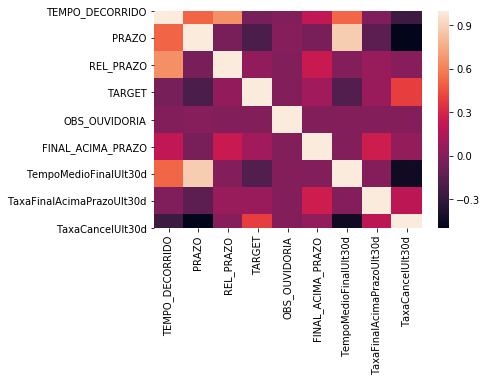

In [111]:
#Mapa de calor da correlação entre as variáveis:
sns.heatmap(df.corr())

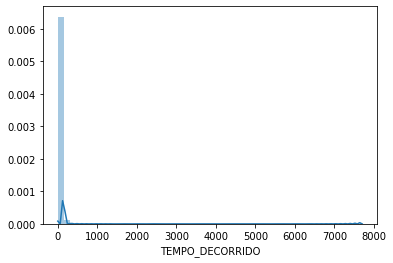

In [112]:
#Distribuição de serviços até a sua finalização:
sns.distplot(df.TEMPO_DECORRIDO)

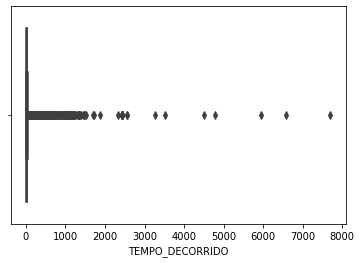

In [113]:
#Outliers no tempo de finalização, temos alguns casos que fogem muito da realidade,
#com tempo de finalização acima de 1.000h:
sns.boxplot(df.TEMPO_DECORRIDO)

In [114]:
#75% da base tem o valor de tempo <= 25.844514
df[['TEMPO_DECORRIDO']].describe()

,TEMPO_DECORRIDO
count,308548.000000
mean,30.858599
std,53.410028
min,0.000278
25%,7.048264
50%,20.931667
75%,25.844514
max,7699.824444


In [115]:
#Temos pelo menos 83 casos cujo tempo de finalizacao ultrapassou 1000h.
df[df['TEMPO_DECORRIDO'] > 1000].count()

CODIGO                       83
COD_POLO                     83
COD_AREA_SERVICO             83
COD_SETOR_ABAST              83
COD_BACIA_ESGOT              83
COD_MUNICIPIO                83
COD_SERVICO                  83
DATA_REG                     83
DATAENT                      83
PRIORI                       83
GRUPO_SERVICO_OPERACIONAL    83
GRUPO_SERVICO_195            83
COD_SERVICO_ETAPA            83
DATA_CRIACAO_ETAPA           83
DATA_FIM_SERVICO             83
COD_SERVICO_EXECUTADO        83
ID_SERVICO                   83
ID_LIGACAO                   83
TEMPO_DECORRIDO              83
PRAZO                        83
REL_PRAZO                    83
DIA_DA_SEMANA_REG            83
DIA_DA_SEMANA_FIM            83
HORA_ACAT                    83
TARGET                       83
FINAL_YYYYMM                 83
OBS_OUVIDORIA                83
FINAL_ACIMA_PRAZO            83
FINAL_YYYYMMDD               83
TempoMedioFinalUlt30d        83
TaxaFinalAcimaPrazoUlt30d    83
TaxaCanc

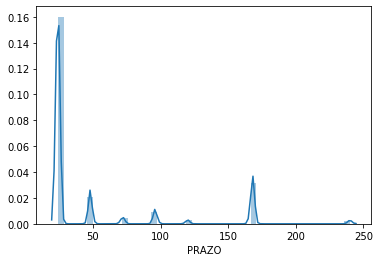

In [116]:
#A maior parte dos servicos possui prazo de execucao de 24h:
sns.distplot(df.PRAZO)

In [117]:
#Distribuicao de servicos cancelados:
plot_target = df.groupby(by='TARGET').agg({'CODIGO':'count'})
plot_target.head()

,CODIGO
TARGET,
0,195448
1,113100


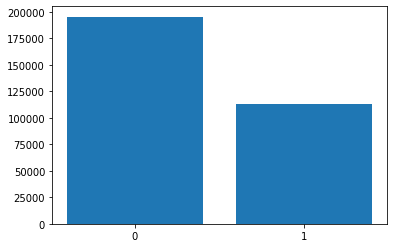

In [118]:
plt.bar(plot_target.index, plot_target.CODIGO)
bars = ("0", "1")
plt.xticks(plot_target.index, bars)
plt.show()

In [119]:
#As 10 áreas de serviço com maior quantidade de acatamento:
plot_CODAREASERVICO = df.groupby(by='COD_AREA_SERVICO').agg({'CODIGO':'count'})
plot_CODAREASERVICO.sort_values(by='CODIGO', axis=0, ascending=False).head(10)

,CODIGO
COD_AREA_SERVICO,
1295,34786
1305,26885
1292,25061
0708,19172
1302,17540
1293,17531
1291,15801
1301,14718
0704,13944


## 4. Construindo a ABT:


In [120]:
df.index.unique()

CategoricalIndex(['2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
                  '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
                  '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
                  '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
                  '2019-12', '2020-01', '2020-02', '2020-03', '2020-04'],
                 categories=['2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', ...], ordered=False, name='ACAT_YYYYMM', dtype='category')

In [121]:
#Extraindo um dataframe por mês, levando em consideração a data referência em que o serviço foi solicitado:
df2018_04 = df.loc['2018-04']
df2018_05 = df.loc['2018-05']
df2018_06 = df.loc['2018-06']
df2018_07 = df.loc['2018-07']
df2018_08 = df.loc['2018-08']
df2018_09 = df.loc['2018-09']
df2018_10 = df.loc['2018-10']
df2018_11 = df.loc['2018-11']
df2018_12 = df.loc['2018-12']
df2019_01 = df.loc['2019-01']
df2019_02 = df.loc['2019-02']
df2019_03 = df.loc['2019-03']
df2019_04 = df.loc['2019-04']
df2019_05 = df.loc['2019-05']
df2019_06 = df.loc['2019-06']
df2019_07 = df.loc['2019-07']
df2019_08 = df.loc['2019-08']
df2019_09 = df.loc['2019-09']
df2019_10 = df.loc['2019-10']
df2019_11 = df.loc['2019-11']
df2019_12 = df.loc['2019-12']
df2020_01 = df.loc['2020-01']
df2020_02 = df.loc['2020-02']
df2020_03 = df.loc['2020-03']
df2020_04 = df.loc['2020-04']

In [122]:
#Vamos descartar o mês 4 de 2020 por conta da pandemia, conforme AED tivemos uma queda significativa
#no acatamento de servicos para os tres polos de manutencao como um todo.

#Vamos separar o mês 3 de 2020 para teste e treinar com todos os meses anteriores.

df_final = df2018_04.append([df2018_05, df2018_06, df2018_07, df2018_08, df2018_09, df2018_10, df2018_11, df2018_12,
                             df2019_01, df2019_02, df2019_03, df2019_04, df2019_05, df2019_06, df2019_07, df2019_08,
                             df2019_09, df2019_10, df2019_11, df2019_12, df2020_01, df2020_02])
df_teste = df2020_03

In [123]:
#Removendo o INDEX
df_final = df_final.reset_index()
df_teste = df_teste.reset_index()

In [124]:
#Dataframe antes de separar por meses:
df.describe()

,TEMPO_DECORRIDO,PRAZO,REL_PRAZO,TARGET,OBS_OUVIDORIA,FINAL_ACIMA_PRAZO,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d
count,308548.000000,308548.000000,308548.000000,308548.000000,308548.000000,308548.000000,308548.000000,308548.000000,308548.000000
mean,30.858599,52.982278,0.632285,0.366556,0.002593,0.065724,30.782929,0.066385,0.367299
std,53.410028,53.742782,1.224957,0.481864,0.050853,0.247799,31.135338,0.073313,0.197385
min,0.000278,24.000000,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.048264,24.000000,0.237257,0.000000,0.000000,0.000000,14.486085,0.021858,0.237136
50%,20.931667,24.000000,0.679485,0.000000,0.000000,0.000000,16.238367,0.038402,0.327973
75%,25.844514,48.000000,0.905185,1.000000,0.000000,0.000000,30.239866,0.087302,0.548872
max,7699.824444,240.000000,320.826019,1.000000,1.000000,1.000000,1465.330391,1.000000,1.000000


In [125]:
#Dataframe para modelagem e treinamento apos separacao:
df_final.describe()

,TEMPO_DECORRIDO,PRAZO,REL_PRAZO,TARGET,OBS_OUVIDORIA,FINAL_ACIMA_PRAZO,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d
count,290966.000000,290966.000000,290966.000000,290966.000000,290966.000000,290966.000000,290966.000000,290966.000000,290966.000000
mean,31.068293,53.054941,0.633560,0.368737,0.002557,0.067338,30.813957,0.067318,0.368082
std,54.073587,53.848602,1.230701,0.482463,0.050502,0.250606,31.262445,0.074175,0.197070
min,0.000278,24.000000,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.067778,24.000000,0.238925,0.000000,0.000000,0.000000,14.456572,0.022263,0.241379
50%,20.972500,24.000000,0.682072,0.000000,0.000000,0.000000,16.117222,0.038710,0.328149
75%,25.997847,48.000000,0.906305,1.000000,0.000000,0.000000,30.295469,0.088864,0.549540
max,7699.824444,240.000000,320.826019,1.000000,1.000000,1.000000,1465.330391,1.000000,1.000000


In [126]:
#Amostra da ABT:
df_final.head()

,ACAT_YYYYMM,CODIGO,COD_POLO,COD_AREA_SERVICO,COD_SETOR_ABAST,COD_BACIA_ESGOT,COD_MUNICIPIO,COD_SERVICO,DATA_REG,DATAENT,...,DIA_DA_SEMANA_FIM,HORA_ACAT,TARGET,FINAL_YYYYMM,OBS_OUVIDORIA,FINAL_ACIMA_PRAZO,FINAL_YYYYMMDD,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d
0,2018-04,966742732,12,1293,A038,E006,100,1.180,2018-04-28 07:51:48,2018-04-28 07:52:06,...,5.0,7,1,2018-04,0,0,2018-04-28,13.621722,0.021605,0.273148
1,2018-04,988662484,12,1295,A026D,E009,100,1.180,2018-04-16 07:00:00,2018-04-16 07:00:00,...,0.0,7,0,2018-04,0,0,2018-04-16,13.375598,0.018470,0.295515
2,2018-04,130526551,13,1305,A010B,E016,100,1.540,2018-04-06 07:18:28,2018-04-06 07:18:38,...,4.0,7,1,2018-04,0,0,2018-04-06,15.771153,0.227273,0.393939
3,2018-04,120642280,12,1295,A026A,E009,100,2.430,2018-04-12 11:19:13,2018-04-12 11:19:26,...,6.0,11,0,2018-04,0,1,2018-04-22,45.933776,0.152542,0.491525
4,2018-04,70572688,07,0730,A031B,E013,100,2.430,2018-04-28 13:24:57,2018-04-28 13:25:23,...,0.0,13,1,2018-04,0,0,2018-04-30,46.743113,0.155844,0.467532


In [127]:
df_final.columns

Index(['ACAT_YYYYMM', 'CODIGO', 'COD_POLO', 'COD_AREA_SERVICO',
       'COD_SETOR_ABAST', 'COD_BACIA_ESGOT', 'COD_MUNICIPIO', 'COD_SERVICO',
       'DATA_REG', 'DATAENT', 'PRIORI', 'GRUPO_SERVICO_OPERACIONAL',
       'GRUPO_SERVICO_195', 'COD_SERVICO_ETAPA', 'DATA_CRIACAO_ETAPA',
       'DATA_FIM_SERVICO', 'COD_SERVICO_EXECUTADO', 'ID_SERVICO', 'ID_LIGACAO',
       'TEMPO_DECORRIDO', 'PRAZO', 'REL_PRAZO', 'DIA_DA_SEMANA_REG',
       'DIA_DA_SEMANA_FIM', 'HORA_ACAT', 'TARGET', 'FINAL_YYYYMM',
       'OBS_OUVIDORIA', 'FINAL_ACIMA_PRAZO', 'FINAL_YYYYMMDD',
       'TempoMedioFinalUlt30d', 'TaxaFinalAcimaPrazoUlt30d',
       'TaxaCancelUlt30d'],
      dtype='object')

In [128]:
#Removendo variaveis desnecessarias, após validação das informações com a área de negócio e AED.
base_analitica = df_final
remove_VARS = ['ACAT_YYYYMM', 'CODIGO', 'COD_POLO', 'COD_SETOR_ABAST','COD_BACIA_ESGOT', 'COD_MUNICIPIO', 'COD_SERVICO',
               'DATA_REG', 'DATAENT', 'GRUPO_SERVICO_OPERACIONAL', 'GRUPO_SERVICO_195', 'DATA_CRIACAO_ETAPA', 
               'DATA_FIM_SERVICO', 'COD_SERVICO_EXECUTADO', 'ID_SERVICO', 'ID_LIGACAO', 'TEMPO_DECORRIDO',
               'REL_PRAZO', 'DIA_DA_SEMANA_FIM', 'HORA_ACAT', 'FINAL_YYYYMM', 'FINAL_ACIMA_PRAZO', 'FINAL_YYYYMMDD']
for i in remove_VARS:
    del base_analitica[i]
    
base_analitica.columns

Index(['COD_AREA_SERVICO', 'PRIORI', 'COD_SERVICO_ETAPA', 'PRAZO',
       'DIA_DA_SEMANA_REG', 'TARGET', 'OBS_OUVIDORIA', 'TempoMedioFinalUlt30d',
       'TaxaFinalAcimaPrazoUlt30d', 'TaxaCancelUlt30d'],
      dtype='object')

In [129]:
#Formatando o df da base teste:

base_teste = df_teste
remove_VARS = ['ACAT_YYYYMM', 'CODIGO', 'COD_POLO', 'COD_SETOR_ABAST','COD_BACIA_ESGOT', 'COD_MUNICIPIO', 'COD_SERVICO',
               'DATA_REG', 'DATAENT', 'GRUPO_SERVICO_OPERACIONAL', 'GRUPO_SERVICO_195', 'DATA_CRIACAO_ETAPA', 
               'DATA_FIM_SERVICO', 'COD_SERVICO_EXECUTADO', 'ID_SERVICO', 'ID_LIGACAO', 'TEMPO_DECORRIDO',
               'REL_PRAZO', 'DIA_DA_SEMANA_FIM', 'HORA_ACAT', 'FINAL_YYYYMM', 'FINAL_ACIMA_PRAZO', 'FINAL_YYYYMMDD']
for i in remove_VARS:
    del base_teste[i]
    
base_analitica.columns

Index(['COD_AREA_SERVICO', 'PRIORI', 'COD_SERVICO_ETAPA', 'PRAZO',
       'DIA_DA_SEMANA_REG', 'TARGET', 'OBS_OUVIDORIA', 'TempoMedioFinalUlt30d',
       'TaxaFinalAcimaPrazoUlt30d', 'TaxaCancelUlt30d'],
      dtype='object')

In [130]:
base_analitica.shape

(290966, 10)

In [131]:
base_teste.shape

(10604, 10)

In [132]:
base_analitica.describe()

,PRAZO,TARGET,OBS_OUVIDORIA,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d
count,290966.000000,290966.000000,290966.000000,290966.000000,290966.000000,290966.000000
mean,53.054941,0.368737,0.002557,30.813957,0.067318,0.368082
std,53.848602,0.482463,0.050502,31.262445,0.074175,0.197070
min,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,14.456572,0.022263,0.241379
50%,24.000000,0.000000,0.000000,16.117222,0.038710,0.328149
75%,48.000000,1.000000,0.000000,30.295469,0.088864,0.549540
max,240.000000,1.000000,1.000000,1465.330391,1.000000,1.000000


In [133]:
base_teste.describe()

,PRAZO,TARGET,OBS_OUVIDORIA,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d
count,10604.000000,10604.000000,10604.000000,10604.000000,10604.000000,10604.000000
mean,53.350434,0.338551,0.003395,33.224852,0.060656,0.366239
std,53.884838,0.473239,0.058170,32.623898,0.061591,0.210827
min,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,16.093763,0.014563,0.201022
50%,24.000000,0.000000,0.000000,17.573777,0.037083,0.292035
75%,48.000000,1.000000,0.000000,30.839374,0.086705,0.575296
max,240.000000,1.000000,1.000000,631.539537,0.644444,0.923077


In [134]:
base_analitica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290966 entries, 0 to 290965
Data columns (total 10 columns):
COD_AREA_SERVICO             290966 non-null category
PRIORI                       290966 non-null category
COD_SERVICO_ETAPA            290966 non-null object
PRAZO                        290966 non-null int32
DIA_DA_SEMANA_REG            290966 non-null category
TARGET                       290966 non-null int32
OBS_OUVIDORIA                290966 non-null int32
TempoMedioFinalUlt30d        290966 non-null float64
TaxaFinalAcimaPrazoUlt30d    290966 non-null float64
TaxaCancelUlt30d             290966 non-null float64
dtypes: category(3), float64(3), int32(3), object(1)
memory usage: 13.3+ MB


In [135]:
base_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10604 entries, 0 to 10603
Data columns (total 10 columns):
COD_AREA_SERVICO             10604 non-null category
PRIORI                       10604 non-null category
COD_SERVICO_ETAPA            10604 non-null object
PRAZO                        10604 non-null int32
DIA_DA_SEMANA_REG            10604 non-null category
TARGET                       10604 non-null int32
OBS_OUVIDORIA                10604 non-null int32
TempoMedioFinalUlt30d        10604 non-null float64
TaxaFinalAcimaPrazoUlt30d    10604 non-null float64
TaxaCancelUlt30d             10604 non-null float64
dtypes: category(3), float64(3), int32(3), object(1)
memory usage: 503.9+ KB


In [136]:
#Redefinindo o tipo da variavel:

base_analitica['PRAZO'] = base_analitica['PRAZO'].astype('category')
base_analitica['OBS_OUVIDORIA'] = base_analitica['OBS_OUVIDORIA'].astype('category')
base_analitica['COD_SERVICO_ETAPA'] = base_analitica['COD_SERVICO_ETAPA'].astype('category')


base_teste['PRAZO'] = base_teste['PRAZO'].astype('category')
base_teste['OBS_OUVIDORIA'] = base_teste['OBS_OUVIDORIA'].astype('category')
base_teste['COD_SERVICO_ETAPA'] = base_teste['COD_SERVICO_ETAPA'].astype('category')

In [137]:
#Conferindo os tipos:
base_analitica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290966 entries, 0 to 290965
Data columns (total 10 columns):
COD_AREA_SERVICO             290966 non-null category
PRIORI                       290966 non-null category
COD_SERVICO_ETAPA            290966 non-null category
PRAZO                        290966 non-null category
DIA_DA_SEMANA_REG            290966 non-null category
TARGET                       290966 non-null int32
OBS_OUVIDORIA                290966 non-null category
TempoMedioFinalUlt30d        290966 non-null float64
TaxaFinalAcimaPrazoUlt30d    290966 non-null float64
TaxaCancelUlt30d             290966 non-null float64
dtypes: category(6), float64(3), int32(1)
memory usage: 9.7 MB


In [138]:
#Conferindo a amostra da base_analitica:
base_analitica.head()

,COD_AREA_SERVICO,PRIORI,COD_SERVICO_ETAPA,PRAZO,DIA_DA_SEMANA_REG,TARGET,OBS_OUVIDORIA,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d
0,1293,21,1.180,24,5,1,0,13.621722,0.021605,0.273148
1,1295,10,1.180,24,0,0,0,13.375598,0.018470,0.295515
2,1305,10,1.540,24,4,1,0,15.771153,0.227273,0.393939
3,1295,22,2.430,96,3,0,0,45.933776,0.152542,0.491525
4,0730,10,2.430,96,5,1,0,46.743113,0.155844,0.467532


In [139]:
base_analitica.shape

(290966, 10)

In [140]:
base_teste.shape

(10604, 10)

In [141]:
#Conferindo a amostra da base_teste:
base_teste.head()

,COD_AREA_SERVICO,PRIORI,COD_SERVICO_ETAPA,PRAZO,DIA_DA_SEMANA_REG,TARGET,OBS_OUVIDORIA,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d
0,1292,10,1.250,24,2,0,0,20.634579,0.158465,0.108268
1,0708,22,1.500,24,0,1,0,20.820197,0.050505,0.585859
2,0704,10,1.510,24,3,0,0,15.540226,0.019441,0.534629
3,1302,10,1.510,24,6,1,0,15.851179,0.029343,0.570423
4,1290,10,2.090,168,3,0,0,51.678746,0.009346,0.168224


In [142]:
# Tratando as variaveis categoricas
base_analitica.nunique()

COD_AREA_SERVICO                44
PRIORI                           4
COD_SERVICO_ETAPA               65
PRAZO                            7
DIA_DA_SEMANA_REG                7
TARGET                           2
OBS_OUVIDORIA                    2
TempoMedioFinalUlt30d        27296
TaxaFinalAcimaPrazoUlt30d     8806
TaxaCancelUlt30d             12950
dtype: int64

In [143]:
#Variaveis categoricas com cardinalidade menor ou igual a 10, utilizamos o get_dummies:
dum = pd.get_dummies(base_analitica,
                    columns=['PRIORI',
                            'PRAZO',
                            'DIA_DA_SEMANA_REG',
                            'OBS_OUVIDORIA'],
                    drop_first=True,
                    prefix=['PRIORI',
                            'PRAZO',
                            'DIA_DA_SEMANA_REG',
                            'OBS_OUVIDORIA'],
                    prefix_sep='_')
dum.head()

,COD_AREA_SERVICO,COD_SERVICO_ETAPA,TARGET,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d,PRIORI_20,PRIORI_21,PRIORI_22,PRAZO_48,...,PRAZO_120,PRAZO_168,PRAZO_240,DIA_DA_SEMANA_REG_1,DIA_DA_SEMANA_REG_2,DIA_DA_SEMANA_REG_3,DIA_DA_SEMANA_REG_4,DIA_DA_SEMANA_REG_5,DIA_DA_SEMANA_REG_6,OBS_OUVIDORIA_1
0,1293,1.180,1,13.621722,0.021605,0.273148,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1295,1.180,0,13.375598,0.018470,0.295515,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1305,1.540,1,15.771153,0.227273,0.393939,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1295,2.430,0,45.933776,0.152542,0.491525,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0730,2.430,1,46.743113,0.155844,0.467532,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [144]:
#Variaveis com categoricas cardinalidade menor ou igual a 10, utilizamos o get_dummies:
#BASE TESTE
dum_teste = pd.get_dummies(base_teste,
                    columns=['PRIORI',
                            'PRAZO',
                            'DIA_DA_SEMANA_REG',
                            'OBS_OUVIDORIA'],
                    drop_first=True,
                    prefix=['PRIORI',
                            'PRAZO',
                            'DIA_DA_SEMANA_REG',
                            'OBS_OUVIDORIA'],
                    prefix_sep='_')
dum.head()

,COD_AREA_SERVICO,COD_SERVICO_ETAPA,TARGET,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d,PRIORI_20,PRIORI_21,PRIORI_22,PRAZO_48,...,PRAZO_120,PRAZO_168,PRAZO_240,DIA_DA_SEMANA_REG_1,DIA_DA_SEMANA_REG_2,DIA_DA_SEMANA_REG_3,DIA_DA_SEMANA_REG_4,DIA_DA_SEMANA_REG_5,DIA_DA_SEMANA_REG_6,OBS_OUVIDORIA_1
0,1293,1.180,1,13.621722,0.021605,0.273148,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1295,1.180,0,13.375598,0.018470,0.295515,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1305,1.540,1,15.771153,0.227273,0.393939,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1295,2.430,0,45.933776,0.152542,0.491525,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0730,2.430,1,46.743113,0.155844,0.467532,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [145]:
#Removendo index das dummies BASE_ANALITICA:
dum.reset_index(drop=True, inplace=True)

#Removendo index das dummies BASE TESTE:
dum_teste.reset_index(drop=True, inplace=True)
dum.head()

,COD_AREA_SERVICO,COD_SERVICO_ETAPA,TARGET,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d,PRIORI_20,PRIORI_21,PRIORI_22,PRAZO_48,...,PRAZO_120,PRAZO_168,PRAZO_240,DIA_DA_SEMANA_REG_1,DIA_DA_SEMANA_REG_2,DIA_DA_SEMANA_REG_3,DIA_DA_SEMANA_REG_4,DIA_DA_SEMANA_REG_5,DIA_DA_SEMANA_REG_6,OBS_OUVIDORIA_1
0,1293,1.180,1,13.621722,0.021605,0.273148,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1295,1.180,0,13.375598,0.018470,0.295515,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1305,1.540,1,15.771153,0.227273,0.393939,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1295,2.430,0,45.933776,0.152542,0.491525,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0730,2.430,1,46.743113,0.155844,0.467532,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [146]:
#Variaveis com cardinalidade maior que 10, utilizamos o Label Encoder:
#BASE ANALITICA

le = preprocessing.LabelEncoder()

le_COD_AREA_SERVICO = le.fit_transform(dum['COD_AREA_SERVICO'])
le_COD_AREA_SERVICO_df = pd.DataFrame(le_COD_AREA_SERVICO, columns=['LE_COD_AREA_SERVICO'])

le_COD_SERVICO_ETAPA = le.fit_transform(dum['COD_SERVICO_ETAPA'])
le_COD_SERVICO_ETAPA_df = pd.DataFrame(le_COD_SERVICO_ETAPA, columns=['LE_COD_SERVICO_ETAPA'])

#Variaveis com cardinalidade maior que 10, utilizamos o Label Encoder:
#BASE TESTE

le = preprocessing.LabelEncoder()

le_COD_AREA_SERVICO_teste = le.fit_transform(dum_teste['COD_AREA_SERVICO'])
le_COD_AREA_SERVICO_df_teste = pd.DataFrame(le_COD_AREA_SERVICO_teste, columns=['LE_COD_AREA_SERVICO'])

le_COD_SERVICO_ETAPA_teste = le.fit_transform(dum_teste['COD_SERVICO_ETAPA'])
le_COD_SERVICO_ETAPA_df_teste = pd.DataFrame(le_COD_SERVICO_ETAPA_teste, columns=['LE_COD_SERVICO_ETAPA'])


In [147]:
#Merging das bases ABT e Teste:

df2 = pd.merge(dum, le_COD_AREA_SERVICO_df, left_index=True, right_index=True)
df2 = pd.merge(df2, le_COD_SERVICO_ETAPA_df, left_index=True, right_index=True)

df2_teste = pd.merge(dum_teste, le_COD_AREA_SERVICO_df_teste, left_index=True, right_index=True)
df2_teste = pd.merge(df2_teste, le_COD_SERVICO_ETAPA_df_teste, left_index=True, right_index=True)

list(df2.columns.values)

['COD_AREA_SERVICO',
 'COD_SERVICO_ETAPA',
 'TARGET',
 'TempoMedioFinalUlt30d',
 'TaxaFinalAcimaPrazoUlt30d',
 'TaxaCancelUlt30d',
 'PRIORI_20',
 'PRIORI_21',
 'PRIORI_22',
 'PRAZO_48',
 'PRAZO_72',
 'PRAZO_96',
 'PRAZO_120',
 'PRAZO_168',
 'PRAZO_240',
 'DIA_DA_SEMANA_REG_1',
 'DIA_DA_SEMANA_REG_2',
 'DIA_DA_SEMANA_REG_3',
 'DIA_DA_SEMANA_REG_4',
 'DIA_DA_SEMANA_REG_5',
 'DIA_DA_SEMANA_REG_6',
 'OBS_OUVIDORIA_1',
 'LE_COD_AREA_SERVICO',
 'LE_COD_SERVICO_ETAPA']

In [148]:
#BASE ANALITICA
#Seleção de dados:

dados_selecionados = df2[['COD_AREA_SERVICO',
 'COD_SERVICO_ETAPA',
 'TARGET',
 'TempoMedioFinalUlt30d',
 'TaxaFinalAcimaPrazoUlt30d',
 'TaxaCancelUlt30d',
 'PRIORI_20',
 'PRIORI_21',
 'PRIORI_22',
 'PRAZO_48',
 'PRAZO_72',
 'PRAZO_96',
 'PRAZO_120',
 'PRAZO_168',
 'PRAZO_240',
 'DIA_DA_SEMANA_REG_1',
 'DIA_DA_SEMANA_REG_2',
 'DIA_DA_SEMANA_REG_3',
 'DIA_DA_SEMANA_REG_4',
 'DIA_DA_SEMANA_REG_5',
 'DIA_DA_SEMANA_REG_6',
 'OBS_OUVIDORIA_1',
 'LE_COD_AREA_SERVICO',
 'LE_COD_SERVICO_ETAPA']]

In [149]:
#BASE TESTE

dados_selecionados_teste = df2_teste[['COD_AREA_SERVICO',
 'COD_SERVICO_ETAPA',
 'TARGET',
 'TempoMedioFinalUlt30d',
 'TaxaFinalAcimaPrazoUlt30d',
 'TaxaCancelUlt30d',
 'PRIORI_20',
 'PRIORI_21',
 'PRIORI_22',
 'PRAZO_48',
 'PRAZO_72',
 'PRAZO_96',
 'PRAZO_120',
 'PRAZO_168',
 'PRAZO_240',
 'DIA_DA_SEMANA_REG_1',
 'DIA_DA_SEMANA_REG_2',
 'DIA_DA_SEMANA_REG_3',
 'DIA_DA_SEMANA_REG_4',
 'DIA_DA_SEMANA_REG_5',
 'DIA_DA_SEMANA_REG_6',
 'OBS_OUVIDORIA_1',
 'LE_COD_AREA_SERVICO',
 'LE_COD_SERVICO_ETAPA']]

## 4.1 Métodos de Seleção de Variáveis:

As variaveis que mais explicam a target de acordo com os metodos de seleção Filtro, Wrapper e Embedded.

In [150]:
#Vamos separar as variaveis explicativas da Target:
#BASE ANALITICA
explicativas = dados_selecionados.drop(columns=['TARGET'])
target = dados_selecionados['TARGET']

#BASE TESTE
explicativas_teste = dados_selecionados_teste.drop(columns=['TARGET'])
target_teste = dados_selecionados_teste['TARGET']

In [151]:
#Vamos utilizar os Metodos de Selecao (Filtro, Wrapper e Embedded)
#Metodo Filtro

X_norm = MinMaxScaler().fit_transform(explicativas)

chi_selector = SelectKBest(chi2, k=5)
chi_selector.fit(explicativas, target)
chi_support = chi_selector.get_support()
chi_feature = explicativas.loc[:, chi_support].columns.tolist()

print(str(len(chi_feature)), 'Features selecionadas:')
print(chi_feature)

5 Features selecionadas:
['COD_AREA_SERVICO', 'TempoMedioFinalUlt30d', 'PRAZO_48', 'PRAZO_168', 'LE_COD_SERVICO_ETAPA']


In [152]:
#Metodo Wrapper

rfe_selector = RFE(estimator=LogisticRegression(random_state=42), step=20,
                  verbose=5, n_features_to_select=5)

rfe_selector.fit(explicativas, target)
rfe_support = rfe_selector.get_support()
rfe_feature = explicativas.loc[:, rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'Features selecionadas:')
print(rfe_feature)

Fitting estimator with 23 features.


C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5 Features selecionadas:
['COD_SERVICO_ETAPA', 'TaxaFinalAcimaPrazoUlt30d', 'TaxaCancelUlt30d', 'PRAZO_120', 'PRAZO_168']


In [153]:
#Metodo Embedded

embedded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,
                                                             random_state=42),
                                      max_features=5)
embedded_rf_selector.fit(explicativas, target)

embedded_rf_support = embedded_rf_selector.get_support()
embedded_rf_feature = explicativas.loc[:, embedded_rf_support].columns.tolist()

print(str(len(embedded_rf_feature)), 'Features selecionadas:')
print(embedded_rf_feature)

5 Features selecionadas:
['COD_AREA_SERVICO', 'TempoMedioFinalUlt30d', 'TaxaFinalAcimaPrazoUlt30d', 'TaxaCancelUlt30d', 'LE_COD_AREA_SERVICO']


In [154]:
#Comparando os 3 metodos de selecao:

feature_selection_df = pd.DataFrame({'Variaveis':explicativas.columns,
                                    'Chi-2': chi_support,
                                    'RFE': rfe_support,
                                    'Random Forest': embedded_rf_support})
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

feature_selection_df = feature_selection_df.sort_values(['Total', 'Variaveis'],
                                                        ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Variaveis,Chi-2,RFE,Random Forest,Total
1,TempoMedioFinalUlt30d,True,False,True,2
2,TaxaFinalAcimaPrazoUlt30d,False,True,True,2
3,TaxaCancelUlt30d,False,True,True,2
4,PRAZO_168,True,True,False,2
5,COD_AREA_SERVICO,True,False,True,2
6,PRAZO_48,True,False,False,1
7,PRAZO_120,False,True,False,1
8,LE_COD_SERVICO_ETAPA,True,False,False,1
9,LE_COD_AREA_SERVICO,False,False,True,1
10,COD_SERVICO_ETAPA,False,True,False,1


In [155]:
#Selecionando as variaveis explicativas que mais fazem sentido:
#BASE ANALITICA

expl = dados_selecionados[['TempoMedioFinalUlt30d', 'TaxaFinalAcimaPrazoUlt30d', 'TaxaCancelUlt30d',
                          'PRAZO_168', 'LE_COD_AREA_SERVICO']]

#BASE TESTE

expl_teste = dados_selecionados_teste[['TempoMedioFinalUlt30d', 'TaxaFinalAcimaPrazoUlt30d', 'TaxaCancelUlt30d',
                          'PRAZO_168', 'LE_COD_AREA_SERVICO']]

In [156]:
#Conferindo:
#Base explicativa para treinamento do modelo.
expl

,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d,PRAZO_168,LE_COD_AREA_SERVICO
0,13.621722,0.021605,0.273148,0,35
1,13.375598,0.018470,0.295515,0,37
2,15.771153,0.227273,0.393939,0,43
3,45.933776,0.152542,0.491525,0,37
4,46.743113,0.155844,0.467532,0,14
...,...,...,...,...,...
290961,15.891363,0.030269,0.469731,0,33
290962,15.840665,0.046660,0.584305,0,43
290963,124.034872,0.060086,0.055794,1,42
290964,15.777978,0.032009,0.476821,0,7


In [157]:
#Conferindo:
#Base explicativa do teste para predicao da base separada.
expl_teste

,TempoMedioFinalUlt30d,TaxaFinalAcimaPrazoUlt30d,TaxaCancelUlt30d,PRAZO_168,LE_COD_AREA_SERVICO
0,20.634579,0.158465,0.108268,0,29
1,20.820197,0.050505,0.585859,0,7
2,15.540226,0.019441,0.534629,0,3
3,15.851179,0.029343,0.570423,0,35
4,51.678746,0.009346,0.168224,1,27
...,...,...,...,...,...
10599,17.657993,0.146635,0.610577,0,32
10600,108.797316,0.052174,0.043478,1,32
10601,26.494944,0.030488,0.530488,0,36
10602,17.503255,0.006897,0.245977,0,32


In [158]:
#Base final para aplicação dos algoritmos:
base_analitica.shape

(290966, 10)

In [159]:
#Variaveis explicativas utilizadas
expl.columns

Index(['TempoMedioFinalUlt30d', 'TaxaFinalAcimaPrazoUlt30d',
       'TaxaCancelUlt30d', 'PRAZO_168', 'LE_COD_AREA_SERVICO'],
      dtype='object')

## 5. Grid Search
Busca dos melhores parâmetros para aplicação em cada algoritmo.

In [160]:
#Usar a modelagem com grid search e cross validation K fold.
X_train, X_test, y_train, y_test = train_test_split(
expl, target, test_size=0.3, random_state=42)

In [161]:
#Estanciado os modelos com as variações de hiperparâmetros nos dicionários.

modelo_rl = LogisticRegression(random_state=42)
modelo_arv = DecisionTreeClassifier(random_state=42)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_gb = GradientBoostingClassifier(random_state=42)
modelo_linearsvm = LinearSVC(random_state=42, dual = True)
modelo_svm = SVC(random_state=42)

grid_rl = {
    "C": np.logspace(-3,3,7),
    "penalty":["l1", "l2"]
}

grid_arv = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1,2,3,4,5,8]
}
grid_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'criterion':['gini','entropy'],
    'bootstrap':[True,False]
}

grid_gb={
    'min_samples_leaf': [1, 5, 10, 15, 20, 50],
    'min_samples_split': [1.0, 2, 3, 5],
    'max_depth':[1, 3, 5, 8],
    'n_estimators':[10, 20, 30, 50]
}

grid_linearsvm = {
    'penalty': ['l2'],
    'C': np.logspace(-3,3,7),
    'loss': ['hinge', 'squared_hinge'],
}

grid_svm = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [162]:
#GridSearch CV da Regressão Logística:

grid_lr = GridSearchCV(modelo_rl,
                      grid_rl,
                      scoring='accuracy',
                      cv=10);

In [163]:
#GridSearch CV da Árvore de Decisão:

grid_arv = GridSearchCV(modelo_arv,
                       grid_arv,
                       scoring='accuracy',
                       cv=10);

In [164]:
#GridSearch CV do Random Forest:

grid_rf = GridSearchCV(modelo_rf,
                      grid_rf,
                      scoring='accuracy',
                      cv=10);

In [165]:
#GridSearch CV do Gradient Boost:

grid_gb = GridSearchCV(modelo_gb,
                      grid_gb,
                      scoring='accuracy',
                      cv=10);

In [166]:
#GridSearch CV do Linear SVM:

grid_linearsvm = GridSearchCV(modelo_linearsvm,
                      grid_linearsvm,
                      scoring='accuracy',
                      cv=10);

In [167]:
#GridSearch CV do SVM:

grid_svm = GridSearchCV(modelo_svm,
                      grid_svm,
                      scoring='accuracy',
                      cv=10);

## 6. Modelagem Estatística Tradicional
Regressão Logística e Árvore de Decisão.

In [168]:
#Treinando o modelo de Regressão Logística:
grid_lr.fit(X_train, y_train)

C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [169]:
#Treinando o modelo de Árvore de Decisão:
grid_arv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 8]},
            

In [170]:
#Acurácia com a Regressão Logística no Treino:
grid_lr.score(X_train, y_train)

0.6977012510065005

In [171]:
#Acurácia com a Regressão Logística no Teste:
grid_lr.score(X_test, y_test)

0.6982357658380113

In [172]:
#Acurácia com a Regressão Logística no DataFrame separado para teste:
grid_lr.score(expl_teste, target_teste)

0.7036967182195398

In [173]:
#Curva ROC da Regressão Logística no Teste:
from sklearn.metrics import roc_auc_score
y_pred_lr = grid_lr.predict(expl_teste)
roc_auc_score(target_teste, y_pred_lr)

0.6734228320120601

In [174]:
#Melhores parâmetros para Regressão Logística:
grid_lr.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [175]:
#Aplicação da Regressão Logística com os melhores parâmetros:
regressao_logistica = LogisticRegression(C=0.01, penalty='l1', random_state=42)
regressao_logistica.fit(X_train, y_train)

y_pred_lr = regressao_logistica.predict(expl_teste)

print("\n Score no treino: "+str(regressao_logistica.score(X_train, y_train)))
print("\n Score no teste: "+str(regressao_logistica.score(X_test, y_test)))
print("\n Score na base separada (mar-20): "+str(regressao_logistica.score(expl_teste, target_teste)))
print("\n ROC - AUC na base separada (mar-20): "+str(roc_auc_score(target_teste, y_pred_lr)))

print("\n Features: "+str(X_train.columns))
print("\n Coeficientes: "+str(regressao_logistica.coef_))
print("\n Intercepto: "+str(regressao_logistica.intercept_))

C:\Users\erick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



 Score no treino: 0.6977012510065005

 Score no teste: 0.6982357658380113

 Score na base separada (mar-20): 0.7036967182195398

 ROC - AUC na base separada (mar-20): 0.6734228320120601

 Features: Index(['TempoMedioFinalUlt30d', 'TaxaFinalAcimaPrazoUlt30d',
       'TaxaCancelUlt30d', 'PRAZO_168', 'LE_COD_AREA_SERVICO'],
      dtype='object')

 Coeficientes: [[-3.25166206e-03  0.00000000e+00  4.34490503e+00 -6.16219437e-02
   3.88281245e-03]]

 Intercepto: [-2.23271089]


In [176]:
#Acurácia da Árvore de Decisão no Treino:
grid_arv.score(X_train, y_train)

0.7789823052298749

In [177]:
#Acurácia da Árvore de Decisão no Teste:
grid_arv.score(X_test, y_test)

0.6575781876503609

In [178]:
#Acurácia com a Árvore de Decisão no DataFrame separado para teste:
grid_arv.score(expl_teste, target_teste)

0.6336288193134666

In [179]:
#Curva ROC da Árvore de Decisão no Teste:
y_pred_arv = grid_arv.predict(expl_teste)
roc_auc_score(target_teste, y_pred_arv)

0.604343759754665

In [180]:
#Melhores parâmetros utilizados pela árvore de decisão:
grid_arv.best_params_

{'criterion': 'gini', 'min_samples_leaf': 8}

In [181]:
#Aplicação da Árvore de Decisão com os melhores parâmetros:
arvore_decisao = DecisionTreeClassifier(criterion='gini', min_samples_leaf=8, max_leaf_nodes=10, random_state=42)
arvore_decisao.fit(X_train, y_train)
y_pred_arv = arvore_decisao.predict(expl_teste)


print("\n Score no treino: "+str(arvore_decisao.score(X_train, y_train)))
print("\n Score no teste: "+str(arvore_decisao.score(X_test, y_test)))
print("\n Score na base separada (mar-20): "+str(arvore_decisao.score(expl_teste, target_teste)))
print("\n ROC-AUC na base separada (mar-20): "+str(roc_auc_score(target_teste, y_pred_arv)))


 Score no treino: 0.6960613916219879

 Score no teste: 0.6973765608889907

 Score na base separada (mar-20): 0.7023764617125613

 ROC-AUC na base separada (mar-20): 0.6795637535116793


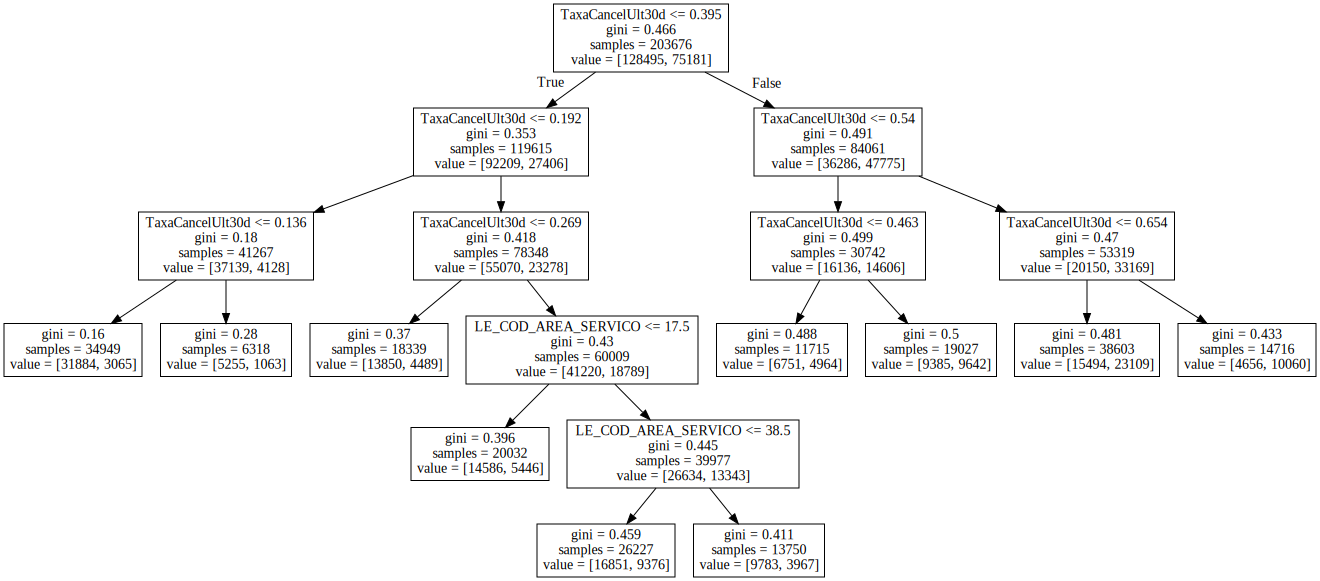

In [182]:
#Criando o objeto para plotar a árvore de decisão:
clf = arvore_decisao.fit(X_train, y_train)
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns))
SVG(graph.pipe(format='svg'))

In [183]:
X_train.columns

Index(['TempoMedioFinalUlt30d', 'TaxaFinalAcimaPrazoUlt30d',
       'TaxaCancelUlt30d', 'PRAZO_168', 'LE_COD_AREA_SERVICO'],
      dtype='object')

In [184]:
arvore_decisao.classes_

array([0, 1])

In [185]:
arvore_decisao.feature_importances_

array([0.        , 0.        , 0.98741266, 0.        , 0.01258734])

In [186]:
#Exportando a imagem:
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns,  
class_names=['0','1'],  
filled=True, rounded=True,  
special_characters=True))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

## 7. Algoritmos de Machine Learning
Random Forest, Boosting e SVM

RANDOM FOREST:

In [187]:
#Treinando o modelo de Random Forest

#Separando treino e teste 30%:
X_train, X_test, y_train, y_test = train_test_split(
expl, target, test_size=0.3, random_state=42)

#Treinando o modelo:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [188]:
#Acuracia no Treino:
grid_rf.score(X_train, y_train)

0.879254305858324

In [189]:
#Melhores parâmetros com o Random Forest:
grid_rf.best_params_

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 500}

In [190]:
#Acurácia no Teste:
grid_rf.score(X_test, y_test)

0.6653224882575324

In [191]:
#Acurácia do Random Forest com o Data Frame separado para teste:
grid_rf.score(expl_teste, target_teste)

0.694172010562052

In [192]:
#Curva ROC do Random Forest no Teste:
y_pred_rf = grid_rf.predict(expl_teste)
roc_auc_score(target_teste, y_pred_rf)

0.6630274270400702

GRADIENT BOOST:

In [193]:
#Treinando o modelo de Gradient Boost

#Separando treino e teste 30%:
X_train, X_test, y_train, y_test = train_test_split(
expl, target, test_size=0.3, random_state=42)

#Treinando o modelo:
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                                                  presort='auto',
  

In [194]:
#Melhores parâmetros do Gradient Boost:
grid_gb.best_params_

{'max_depth': 8,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 50}

In [195]:
#Acuracia no Treino:
grid_gb.score(X_train, y_train)

0.7108103065653293

In [196]:
#Acurácia do Gradient Boost:
grid_gb.score(X_test, y_test)

0.7003665941115821

In [197]:
#Acurácia do Gradient Boost com o Data Frame separado para treino:
grid_gb.score(expl_teste, target_teste)

0.7031308940022633

In [198]:
#Curva ROC do Gradient Boost no Teste:
y_pred_gb = grid_rf.predict(expl_teste)
roc_auc_score(target_teste, y_pred_gb)

0.6630274270400702

LINEAR SVM:

In [199]:
#Treinando o modelo de Linear SVM

#Separando treino e teste 30%:
X_train, X_test, y_train, y_test = train_test_split(
expl, target, test_size=0.3, random_state=42)

#Realizando o Feature Scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Treinamento do modelo SVM:
grid_linearsvm.fit(X_train, y_train)

C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erick\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [200]:
#Melhores parametros:
grid_linearsvm.best_params_

{'C': 1.0, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [201]:
#Score no treino:
grid_linearsvm.score(X_train, y_train)

0.6975686875233214

In [202]:
#Score na base separada para teste:
grid_linearsvm.score(X_test, y_test)

0.6982586779699851

In [206]:
#Realizando o Feature Scaling

expl_teste = sc.transform(expl_teste)
grid_linearsvm.score(expl_teste, target_teste)

0.7040739343643908

In [207]:
#Curva ROC do Linear SVM:
y_pred_linearsvm = grid_linearsvm.predict(expl_teste)
roc_auc_score(target_teste, y_pred_linearsvm)

0.6760876178403242

NAIVE BAYES:

In [209]:
#Treinando o modelo de Naive Bayes

#Separando treino e teste 30%:
#X_train, X_test, y_train, y_test = train_test_split(
#expl, target, test_size=0.3, random_state=42)

#Realizando o Feature Scaling
#sc = StandardScaler()

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

#Treinando o modelo
#modelo_nb.fit(X_train, y_train)

In [210]:
#Score no teste:
#modelo_nb.score(X_test, y_test)

In [211]:
#Score na base separada:
#expl_teste = sc.fit_transform(expl_teste)
#modelo_nb.score(expl_teste, target_test)